In [1]:
#Import packages
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Pull in data from local SQL database
engine = create_engine("sqlite:///data/mta2.db")

In [3]:
all_tables = engine.table_names()
all_tables

<ipython-input-3-9dbbbb8bc6ba>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['turnstile_200104',
 'turnstile_200111',
 'turnstile_200118',
 'turnstile_200125',
 'turnstile_200201',
 'turnstile_200208',
 'turnstile_200215',
 'turnstile_200222',
 'turnstile_200229',
 'turnstile_200307',
 'turnstile_200314',
 'turnstile_200321',
 'turnstile_200328',
 'turnstile_200404',
 'turnstile_200411',
 'turnstile_200418',
 'turnstile_200425',
 'turnstile_200502',
 'turnstile_200509',
 'turnstile_200516',
 'turnstile_200523',
 'turnstile_200530',
 'turnstile_200606',
 'turnstile_200613',
 'turnstile_200620',
 'turnstile_200627',
 'turnstile_200704',
 'turnstile_200711',
 'turnstile_200718',
 'turnstile_200725',
 'turnstile_200801',
 'turnstile_200808',
 'turnstile_200815',
 'turnstile_200822',
 'turnstile_200829',
 'turnstile_200905',
 'turnstile_200912',
 'turnstile_200919',
 'turnstile_200926',
 'turnstile_201003',
 'turnstile_201010',
 'turnstile_201017',
 'turnstile_201024',
 'turnstile_201031',
 'turnstile_201107',
 'turnstile_201114',
 'turnstile_201121',
 'turnstile_2

In [4]:
#Assmple list of weeks to pull in from SQL or website if chosen
week_list = []
for i in all_tables:
    week_list.append(i[-6:])

In [5]:
#SQL pull of data from local machine
def get_data_sql(week_nums):
    filename = "turnstile_{}"
    dfs = []
    for week_num in week_nums:
        file_url = filename.format(week_num)
        dfs.append(pd.read_sql('SELECT * FROM {};'.format(file_url) ,engine))
    return pd.concat(dfs)
        
mta = get_data_sql(week_list)
mta


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713
...,...,...,...,...,...,...,...,...,...,...,...
207049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,05:00:00,REGULAR,5554,544
207050,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,09:00:00,REGULAR,5554,544
207051,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,13:00:00,REGULAR,5554,544
207052,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/19/2021,17:00:00,REGULAR,5554,544


In [ ]:
# To pull the same MTA data from NYC website: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
#week_nums = [160903, 160910, 160917] #Example of list you could pull
#mta_df = get_data(week_list) #Different dataframe

In [6]:
#Preview MTA Data frame
mta.reset_index() 
mta.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713


**For reference here are the field descriptions as given by the MTA Turnstile website**
http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

## Field Descriptions
**C/A**      = Control Area (A002)

**UNIT**     = Remote Unit for a station (R051)

**SCP**      = Subunit Channel Position represents an specific address for a device (02-00-00)

**STATION**  = Represents the station name the device is located at

**LINENAME** = Represents all train lines that can be boarded at this station
           
**DIVISION** = Represents the Line originally the station belonged to BMT, IRT, or IND   
**DATE**     = Represents the date (MM-DD-YY)

**TIME**     = Represents the time (hh:mm:ss) for a scheduled audit event

**DESC**     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
          
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
           
**ENTRIES**  = The comulative entry register value for a device

**EXITS**    = The cumulative exit register value for a device

In [7]:
#Look at columns for the data set
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
# clean up blank space in column headers, specifically EXITS
mta.columns = mta.columns.str.strip() 
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
mta.shape

(13330595, 11)

In [10]:
#Check data types
mta.dtypes 

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [11]:
#Adding in case want to look at date/hour combo
mta['DATETIME'] = pd.to_datetime(mta.DATE + ' ' + mta.TIME, format="%m/%d/%Y %H:%M:%S")

In [12]:
#Adjust data type on date and time / add column in case need to use separetly or as index
mta["DATE"] = pd.to_datetime(mta["DATE"])
mta["TIME"] = pd.to_datetime(mta["TIME"])

In [13]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13330595 entries, 0 to 207053
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   C/A       object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      datetime64[ns]
 7   TIME      datetime64[ns]
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(7)
memory usage: 1.3+ GB


In [14]:
#check values of the description
mta.DESC.value_counts()

REGULAR       13276552
RECOVR AUD       54043
Name: DESC, dtype: int64

In [15]:
#remove missed audit entries as we interested in the regular numbers for the turnstiles and will help avoid duplicates
dropaud = ['RECOVR AUD']
mta = mta.drop(mta[mta.DESC.isin(dropaud)].index)

In [16]:
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-28,2021-04-01 23:00:00,REGULAR,7325143,2482753,2019-12-28 23:00:00
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 11:00:00,REGULAR,7325902,2483207,2019-12-30 11:00:00
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 15:00:00,REGULAR,7326144,2483272,2019-12-30 15:00:00
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 19:00:00,REGULAR,7326696,2483343,2019-12-30 19:00:00
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-04-01 11:00:00,REGULAR,7327075,2483576,2019-12-31 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
207044,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 09:00:00,REGULAR,5554,544,2021-03-18 09:00:00
207045,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 13:00:00,REGULAR,5554,544,2021-03-18 13:00:00
207046,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 17:00:00,REGULAR,5554,544,2021-03-18 17:00:00
207047,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 21:00:00,REGULAR,5554,544,2021-03-18 21:00:00


In [17]:
#Checking total data left after recovery audits stripped out
mta.shape

(10368759, 12)

In [18]:
#Remove DESC from dataframe for less columns
mta = mta.drop(["DESC"], axis=1, errors="ignore")

In [19]:
#Bring in assembled Borough to station mapping, sense check mappings/dataframe
boroughs = pd.read_csv('Borough Mapping1.csv')
borcol = [0] #Columns to remove
boroughs.drop(boroughs.columns[borcol],axis = 1, inplace=True) 
boroughs

,STATION,BOROUGH
0,138/GRAND CONC,Bronx
1,149/GRAND CONC,Bronx
2,161/YANKEE STAD,Bronx
3,167 ST,Bronx
4,170 ST,Bronx
...,...,...
387,PATH WTC 2,Manhattan
388,PATH NEW WTC,Manhattan
389,BLEECKER ST,Manhattan
390,51 ST,Manhattan


In [20]:
#Explore Boroughs names coming in 
boroughs['BOROUGH'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'Newark', 'Harrison', 'Jersey City', 'Unknown', 'Hoboken'],
      dtype=object)

In [21]:
#Join columns on station for new column 'BOROUGH'
mta = pd.merge(left=mta, right=boroughs, how='inner', left_on='STATION', right_on='STATION')

In [22]:
mta.shape
#rows are now higher as we have some station locations that have the same names in different boroughs

(11004997, 12)

In [23]:
## Split similar station names by line and link to appropriate borough
mta.loc[(mta['DIVISION'] == 'BMT') & (mta['STATION'] == '36 ST'), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['DIVISION'] == 'IND') & (mta['STATION'] == '36 ST'), 'BOROUGH'] = 'Queens'
mta.loc[(mta['STATION'] == '77 ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '77 ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'FULTON ST') & (mta['DIVISION'] == 'IND' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'FULTON ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == 'FULTON ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '50 ST') & (mta['DIVISION'] == 'IND' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '50 ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == '50 ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == 'GRAND ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'GRAND ST') & (mta['DIVISION'] == 'IND' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == '79 ST') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == '79 ST') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Manhattan'
mta.loc[(mta['STATION'] == 'PROSPECT AV') & (mta['DIVISION'] == 'BMT' ), 'BOROUGH'] = 'Brooklyn'
mta.loc[(mta['STATION'] == 'PROSPECT AV') & (mta['DIVISION'] == 'IRT' ), 'BOROUGH'] = 'Bronx'

In [24]:
mta = mta.drop_duplicates(keep ='first')

In [25]:
mta.shape

(10357701, 12)

In [26]:
mta.BOROUGH.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Newark', 'Harrison',
       'Jersey City', 'Unknown', 'Hoboken', 'Staten Island'], dtype=object)

In [27]:
#Check if any station mapped to null
mta1 = mta[mta.STATION.isnull()]
mta1

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH


In [28]:
#Remove New Jersey and others so only five Boroughs - Bronx, Brooklyn, Manhattan, Queens and Staten Island
borotogo = ['Newark', 'Harrison', 'Jersey City', 'Unknown', 'Hoboken']
mta = mta.drop(mta[mta.BOROUGH.isin(borotogo)].index)

In [29]:
#Veryify we have the five boroughs
mta.BOROUGH.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [30]:
mta.reset_index
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-28,2021-04-01 23:00:00,7325143,2482753,2019-12-28 23:00:00,Brooklyn
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-04-01 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn
...,...,...,...,...,...,...,...,...,...,...,...,...
11004992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 09:00:00,5554,544,2021-03-18 09:00:00,Manhattan
11004993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 13:00:00,5554,544,2021-03-18 13:00:00,Manhattan
11004994,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 17:00:00,5554,544,2021-03-18 17:00:00,Manhattan
11004995,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 21:00:00,5554,544,2021-03-18 21:00:00,Manhattan


In [31]:
#Look at one individual turnstile
indv_turnstile = ((mta["C/A"] == "A002") &
        (mta["UNIT"] == "R051") & 
        (mta["SCP"] == "02-00-00") & 
        (mta["STATION"] == "59 ST"))

mta[indv_turnstile].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-28,2021-04-01 23:00:00,7325143,2482753,2019-12-28 23:00:00,Brooklyn
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-04-01 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn


In [32]:
# verify that "C/A", "UNIT", "SCP"(aka each turnstile), "STATION", "DATE_TIME" is unique across stations
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION",'DIVISION', "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DIVISION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,BMT,2019-12-28 23:00:00,1
6541083,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-29 05:00:00,1
6541085,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-29 17:00:00,1
6541086,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-29 21:00:00,1
6541087,R160,R164,02-00-01,66 ST-LINCOLN,IRT,2020-05-30 01:00:00,1


In [33]:
#Add a previous day and previous entries to set up to perform day on day entry volume at stations
mta[["PREV_DATE", "PREV_ENTRIES"]] = (mta
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda x: x.shift(1)))
mta.head()

<ipython-input-33-c05fcaf33f81>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta[["PREV_DATE", "PREV_ENTRIES"]] = (mta


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-28,2021-04-01 23:00:00,7325143,2482753,2019-12-28 23:00:00,Brooklyn,NaT,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn,2019-12-28,7325143.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn,2019-12-30,7325902.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn,2019-12-30,7326144.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-04-01 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn,2019-12-30,7326696.0


In [34]:
# Drop the rows for the earliest date
mta.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [35]:
#Check the values seem sensible, we see that we have negative values in the millions and maxs in the millions 
#For a station on a day this is possible, for an individual turnstile that seems unlikely
entry_check = mta['ENTRIES'] - mta["PREV_ENTRIES"]
entry_check.describe(percentiles = [.25, .5, .75])

count    9.806800e+06
mean     2.151943e+02
std      2.618534e+06
min     -1.895328e+09
25%      2.000000e+00
50%      1.900000e+01
75%      7.400000e+01
max      2.038596e+09
dtype: float64

In [36]:
#Show example of negative counts to see behavior
mta[mta["ENTRIES"] < mta["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES
7996,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-02-13,2021-04-01 15:00:00,43,6,2020-02-13 15:00:00,Brooklyn,2020-02-13,83074.0
14581,R244,R050,00-06-00,59 ST,456NQRW,IRT,2020-03-15,2021-04-01 20:00:00,27,32,2020-03-15 20:00:00,Brooklyn,2020-01-27,2549195.0
47841,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-09-13,2021-04-01 04:00:00,27072,4054,2020-09-13 04:00:00,Brooklyn,2020-05-09,44341.0
69701,R245A,R051,01-00-02,59 ST,456NQRW,IRT,2020-12-13,2021-04-01 15:00:00,48,163,2020-12-13 15:00:00,Brooklyn,2020-12-13,643257.0
75876,R245,R051,00-00-00,59 ST,456NQRW,IRT,2021-01-15,2021-04-01 15:00:00,47,21,2021-01-15 15:00:00,Brooklyn,2021-01-15,261148.0


In [37]:
# Focusing in on an example of reverse counter on 57th, it appears a counter was reset at some point that day
reverse = ((mta["C/A"] == "A002") & 
(mta["UNIT"] == "R051") & 
(mta["SCP"] == "02-06-00") & 
(mta["STATION"] == "59 ST") &
(mta["DATETIME"].dt.date == dt.datetime(2020, 2, 13).date()))
mta[reverse].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES
7994,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-02-13,2021-04-01 07:00:00,82692,2854,2020-02-13 07:00:00,Brooklyn,2020-02-12,81749.0
7995,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-02-13,2021-04-01 11:00:00,83074,2855,2020-02-13 11:00:00,Brooklyn,2020-02-13,82692.0
7996,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-02-13,2021-04-01 15:00:00,43,6,2020-02-13 15:00:00,Brooklyn,2020-02-13,83074.0
7997,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-02-13,2021-04-01 19:00:00,643,15,2020-02-13 19:00:00,Brooklyn,2020-02-13,43.0
7998,A002,R051,02-06-00,59 ST,NQR456W,BMT,2020-02-13,2021-04-01 23:00:00,889,24,2020-02-13 23:00:00,Brooklyn,2020-02-13,643.0


In [38]:
# Looking at all stations with this counting issue, we can see that we have quite a few
(mta[mta["ENTRIES"] < mta["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST                 2
A006   R079  00-00-04  5 AV/59 ST            1
             00-03-00  5 AV/59 ST            1
A007   R079  01-06-03  5 AV/59 ST            1
A011   R080  01-03-00  57 ST-7 AV         2408
                                          ... 
R728   R226  00-00-00  GUN HILL RD           1
             00-00-01  GUN HILL RD           1
R729   R292  00-00-01  BAYCHESTER AV         2
R730   R431  00-00-04  EASTCHSTER/DYRE    1973
TRAM1  R468  00-00-01  RIT-MANHATTAN         1
Length: 718, dtype: int64

In [39]:
#We need to remove or adjust negative counters and strip the unrealistic outliers
#one way to do this is to simply take the absolute value of a counter thats negative and assume thats as the count

# First - Negative counts - we take care of negatives by taking the asbolute value and assume they're positive
mta1 = mta.copy(deep='False')
mta1['VOL'] = abs(mta1["ENTRIES"] - mta1["PREV_ENTRIES"])

#Second - Outlier - We isolate a turnstile/station level and use 4 standard devations (99.7% results), anything outside this is dropped
mta1 = mta1[mta1.groupby(["C/A", "UNIT", "SCP", "STATION"])['VOL']
            .apply(lambda vol: (np.abs(vol - vol.mean())/ vol.std()) < 4)]

mta1['VOL'].describe()

count    9.301913e+06
mean     7.736584e+01
std      8.907424e+03
min      0.000000e+00
25%      3.000000e+00
50%      2.200000e+01
75%      7.700000e+01
max      2.191430e+07
Name: VOL, dtype: float64

In [40]:
mta1.shape

(9301913, 15)

In [41]:
#create a function to deal with reverse counting
#given there are 84,600 seconds in a day 4 people/sec/turnstile averaged across 24 hours puts a limit at ~350k 
#anything above this 350,000 we will throw out as an outlier
def daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        #if coutner is reversed
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

mta["DAILY_ENTRIES"] = mta.apply(daily_counts, axis=1, max_counter=350000)

524289 153.0
27 2549195.0
48 643257.0
60 9438081.0
4 7832211.0
22 7896783.0
9 1562921352.0
52586 17116894.0
5 3055293.0
139 528152.0
524295 120318011.0
262147 8863085.0
32 597819.0
458780 85175465.0
261 9753069.0
1254421107 28554762.0
30 1254425410.0
2200 3324824.0
329 16348181.0
16 6566970.0
28448967 5274455.0
5276291 28448967.0
28135572 13797098.0
13799444 28135572.0
16141430 14847478.0
14849611 16141430.0
67822764 11523931.0
11525743 67822764.0
5554054 15517522.0
15519132 5554054.0
111922 2341748.0
2341818 111922.0
5181972 1987319.0
1987403 5181972.0
1007893 35560.0
35742 1007893.0
2018063 3207658.0
3208019 2018063.0
723171 4575435.0
4575965 723171.0
568283 142288.0
143737 568283.0
83 12445710.0
117 1237351900.0
720906 80270.0
25 11715484.0
17 3109024.0
137 6289129.0
109 2087362.0
179 5182776.0
270532634 536177.0
66 398919.0
589827 75.0
22 7149183.0
720921 6946581.0
16 5102094.0
160 11567738.0
200092 7980390.0
7980449 200092.0
10101246 15445501.0
15445554 10101246.0
7049466 128853.0

154 16283709.0
103 2844722.0
3 4008525.0
592408 4715178.0
524516 64642.0
36 352594526.0
1308988150 89033627.0
53100756 704878497.0
1895422953 110089090.0
5 1895327592.0
738431428 53263468.0
53237492 738434642.0
131135 118174528.0
532 10583445.0
555290572 421603550.0
8 13681629.0
646 1614828.0
524397 135382887.0
720897 117445468.0
0 524291.0
671112280 2664539.0
22 5621555.0
24 3242985.0
50 5698151.0
51 2944820.0
51627564 318991258.0
620759226 2471176.0
184 3201434.0
10 1349742.0
196613 917691.0
1006685084 3932619.0
7 1536055.0
17 4625551.0
33 1776715.0
27 592309.0
386 5358660.0
1245276 40701.0
39 2447718.0
245576 2525940.0
2526452 247166.0
1774017 4513916.0
4514240 1775604.0
3237530 931289.0
931712 3238804.0
11004046 115050.0
115671 11006241.0
12337064 161270.0
162927 12340260.0
2246921 348888.0
351262 2251707.0
173 13908992.0
1703967 17387249.0
18 3083086.0
84 1543753.0
4 1278035.0
52 5711068.0
28 14787119.0
23 584960.0
14 825714.0
823394345 34982.0
524288 41914.0
589824 33239.0
434 25

In [42]:
#We have less data rows elimiated using this methodology vs statistical distribution method"
mta.shape

(9806800, 15)

In [43]:
#Decided to go with second as some stations can have hundreds of thousnads of people a day so don't want to be too restrictive
mta

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 11:00:00,7325902,2483207,2019-12-30 11:00:00,Brooklyn,2019-12-28,7325143.0,759.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 15:00:00,7326144,2483272,2019-12-30 15:00:00,Brooklyn,2019-12-30,7325902.0,242.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-30,2021-04-01 19:00:00,7326696,2483343,2019-12-30 19:00:00,Brooklyn,2019-12-30,7326144.0,552.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-04-01 11:00:00,7327075,2483576,2019-12-31 11:00:00,Brooklyn,2019-12-30,7326696.0,379.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-12-31,2021-04-01 15:00:00,7327375,2483648,2019-12-31 15:00:00,Brooklyn,2019-12-31,7327075.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11004992,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 09:00:00,5554,544,2021-03-18 09:00:00,Manhattan,2021-03-18,5554.0,0.0
11004993,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 13:00:00,5554,544,2021-03-18 13:00:00,Manhattan,2021-03-18,5554.0,0.0
11004994,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 17:00:00,5554,544,2021-03-18 17:00:00,Manhattan,2021-03-18,5554.0,0.0
11004995,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-18,2021-04-01 21:00:00,5554,544,2021-03-18 21:00:00,Manhattan,2021-03-18,5554.0,0.0


In [56]:
#Max for function method at right at our 350k mark and the quartiles and mean are in the ball park vs our prior method
#standard deviation higher as more inclusive to outlier days
mta['DAILY_ENTRIES'].describe()

count    9.806790e+06
mean     8.213033e+01
std      1.079071e+03
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+01
75%      7.500000e+01
max      3.493180e+05
Name: DAILY_ENTRIES, dtype: float64

In [57]:
#Create station totals, accumulating turnstiles up to station and putting a date against it
turnstile_station_daily = mta.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
turnstile_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,2019-12-28,1120.0
1,A002,R051,59 ST,2019-12-29,3995.0
2,A002,R051,59 ST,2019-12-30,12960.0
3,A002,R051,59 ST,2019-12-31,10063.0
4,A002,R051,59 ST,2020-01-01,4884.0


In [58]:
#We appear to still have a max of just under 350,000 for a particular turnstile, double checking if it is an outlier
turnstile_station_daily.sort_values(['DAILY_ENTRIES'], ascending = False).head(25)

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
196622,PTH17,R541,THIRTY THIRD ST,2021-01-08,914800.0
194624,PTH09,R548,CHRISTOPHER ST,2020-06-16,898099.0
294498,R510,R090,39 AV,2020-01-07,874421.0
196401,PTH17,R541,THIRTY THIRD ST,2020-06-01,664829.0
232450,R194,R040,231 ST,2020-01-21,663016.0
168356,N507,R023,34 ST-HERALD SQ,2020-03-04,595076.0
195361,PTH11,R545,14TH STREET,2020-01-09,556631.0
294499,R510,R090,39 AV,2020-01-08,539320.0
212290,R132,R190,23 ST,2021-03-15,516089.0
195538,PTH11,R545,14TH STREET,2020-07-04,484188.0


In [59]:
#Let's checking Euclid Av's normal day to see if this makes sense for one turnstile
#IT appears we have two entries that are well above average from September 9th 
euclid = mta.groupby(["C/A", "UNIT", "SCP", "STATION","DATE"],as_index=False).DAILY_ENTRIES.first()
euclid_av = euclid.loc[euclid["STATION"] == "EUCLID AV"] 
euclid_av.sort_values("DAILY_ENTRIES", ascending=False)

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
675460,N128,R200,00-00-00,EUCLID AV,2020-09-09,338377.0
676298,N128,R200,00-00-02,EUCLID AV,2020-09-09,49733.0
677347,N128,R200,00-00-05,EUCLID AV,2020-01-18,7044.0
676923,N128,R200,00-00-04,EUCLID AV,2020-01-18,5166.0
676139,N128,R200,00-00-02,EUCLID AV,2020-03-11,3826.0
...,...,...,...,...,...,...
678025,N128,R200,00-05-00,EUCLID AV,2020-09-28,0.0
678026,N128,R200,00-05-00,EUCLID AV,2020-09-29,0.0
678027,N128,R200,00-05-00,EUCLID AV,2020-09-30,0.0
678028,N128,R200,00-05-00,EUCLID AV,2020-10-01,0.0


In [60]:
turnstile_station_daily.sort_values(['DAILY_ENTRIES'], ascending = False)

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
196622,PTH17,R541,THIRTY THIRD ST,2021-01-08,914800.0
194624,PTH09,R548,CHRISTOPHER ST,2020-06-16,898099.0
294498,R510,R090,39 AV,2020-01-07,874421.0
196401,PTH17,R541,THIRTY THIRD ST,2020-06-01,664829.0
232450,R194,R040,231 ST,2020-01-21,663016.0
...,...,...,...,...,...
41601,D002,R390,8 AV,2020-04-16,0.0
41600,D002,R390,8 AV,2020-04-15,0.0
19121,A082,R028,FULTON ST,2021-02-17,0.0
19120,A082,R028,FULTON ST,2021-02-16,0.0


In [61]:
borough_daily = mta.groupby(['BOROUGH','DATE']).agg({'DAILY_ENTRIES': 'sum'}).sort_values(['DAILY_ENTRIES','DATE'], ascending=False).reset_index()

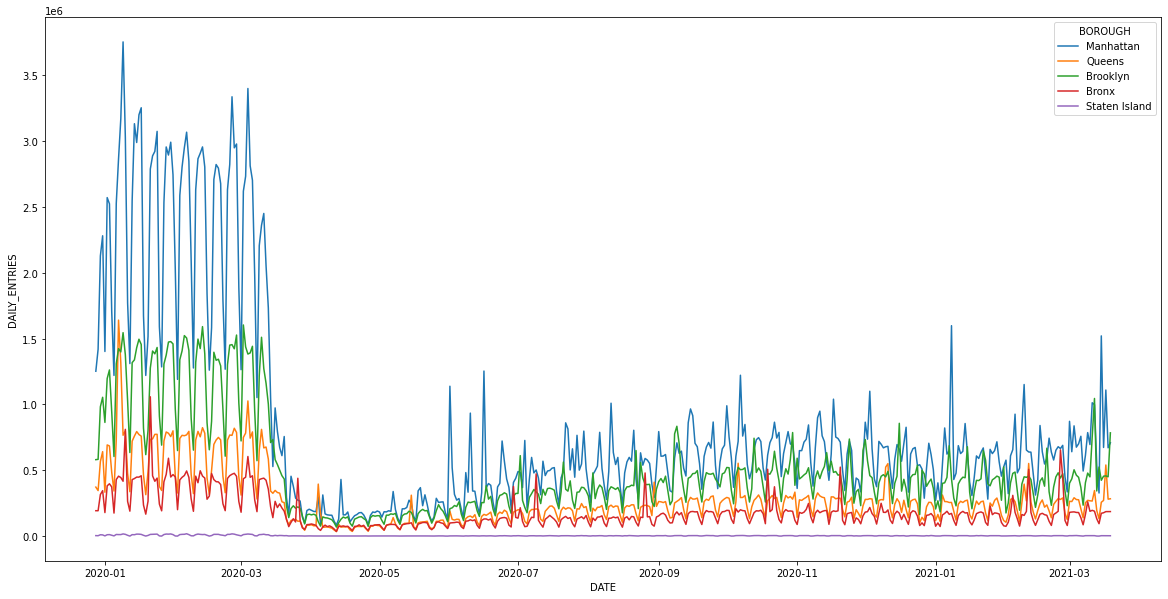

In [62]:
#Let's plot the general Borough trends to see if this Euclid item is impacting data
fig, axs = plt.subplots(figsize=[20, 10])

boroughs_first_look = sns.lineplot(x = "DATE",
                                     y = "DAILY_ENTRIES",
                                     hue = "BOROUGH",
                                     data = borough_daily)


In [51]:
#It appears that the September 9th data on Euclid (Brooklyn) is a significant outlier as its one day total is near yearly volume
#appears average for the station including the large number is 300 a day and closer to less than 100 people
euclid_stat = mta.loc[mta["STATION"] == "EUCLID AV"]
euclid_stat.describe()

,ENTRIES,EXITS,PREV_ENTRIES,DAILY_ENTRIES
count,1.711100e+04,1.711100e+04,1.711100e+04,17111.000000
mean,2.662765e+06,1.037851e+06,2.662655e+06,291.435451
std,7.033347e+06,6.530862e+06,7.033332e+06,7391.088776
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.587520e+05,6.900000e+01,4.587520e+05,0.000000
50%,1.086390e+06,3.073780e+05,1.086383e+06,60.000000
75%,3.178860e+06,9.338855e+05,3.178472e+06,145.000000
max,5.898653e+08,5.887180e+08,5.898653e+08,338377.000000


In [52]:
#focusing in on the date and turnstile at issue
sep9_euclid = mta.loc[(mta["STATION"] == "EUCLID AV") & (mta["DATE"] > "2020-9-06") & (mta["DATE"] < "2020-9-10")]
sep9_euclid.loc[(sep9_euclid['C/A'] == 'N128') & (sep9_euclid['UNIT'] == 'R200') & (sep9_euclid['SCP'] == '00-00-00')].sort_values('DATE')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATETIME,BOROUGH,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
5754200,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-04-01 00:00:00,1235376,357789,2020-09-07 00:00:00,Brooklyn,2020-09-06,1235366.0,10.0
5754201,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-04-01 04:00:00,1235376,357794,2020-09-07 04:00:00,Brooklyn,2020-09-07,1235376.0,0.0
5754202,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-04-01 08:00:00,1235394,357815,2020-09-07 08:00:00,Brooklyn,2020-09-07,1235376.0,18.0
5754203,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-04-01 12:00:00,1235423,357853,2020-09-07 12:00:00,Brooklyn,2020-09-07,1235394.0,29.0
5754204,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-04-01 16:00:00,1235482,357900,2020-09-07 16:00:00,Brooklyn,2020-09-07,1235423.0,59.0
5754205,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-07,2021-04-01 20:00:00,1235539,357964,2020-09-07 20:00:00,Brooklyn,2020-09-07,1235482.0,57.0
5754215,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-04-01 21:00:00,338377,48857,2020-09-08 21:00:00,Brooklyn,2020-09-08,1236003.0,338377.0
5754214,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-04-01 20:00:00,1236003,358223,2020-09-08 20:00:00,Brooklyn,2020-09-08,338297.0,338297.0
5754213,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-04-01 17:00:00,338297,48852,2020-09-08 17:00:00,Brooklyn,2020-09-08,1235952.0,338297.0
5754212,N128,R200,00-00-00,EUCLID AV,AC,IND,2020-09-08,2021-04-01 16:00:00,1235952,358143,2020-09-08 16:00:00,Brooklyn,2020-09-08,338295.0,338295.0


In [53]:
#the Problem with the 8th varying at time stamps, only ~20 people entered the problematic turnstile that day, 
#so we will drop that specific instance
euclid_mask = mta.loc[(mta["STATION"] == "EUCLID AV") & (mta["DATE"] == "2020-9-08") & (mta['C/A'] == 'N128') & (mta['UNIT'] == 'R200') & (mta['SCP'] == '00-00-00')].index
mta.drop(euclid_mask, inplace = True)

In [54]:
#Update previous group by functions
turnstile_station_daily = mta.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()

station_daily = mta.groupby(["BOROUGH", 'STATION',"DATE"])[['DAILY_ENTRIES']].sum().reset_index()

borough_daily = mta.groupby(['BOROUGH','DATE']).agg({'DAILY_ENTRIES': 'sum'}).sort_values(['DAILY_ENTRIES','DATE'], ascending=False).reset_index()


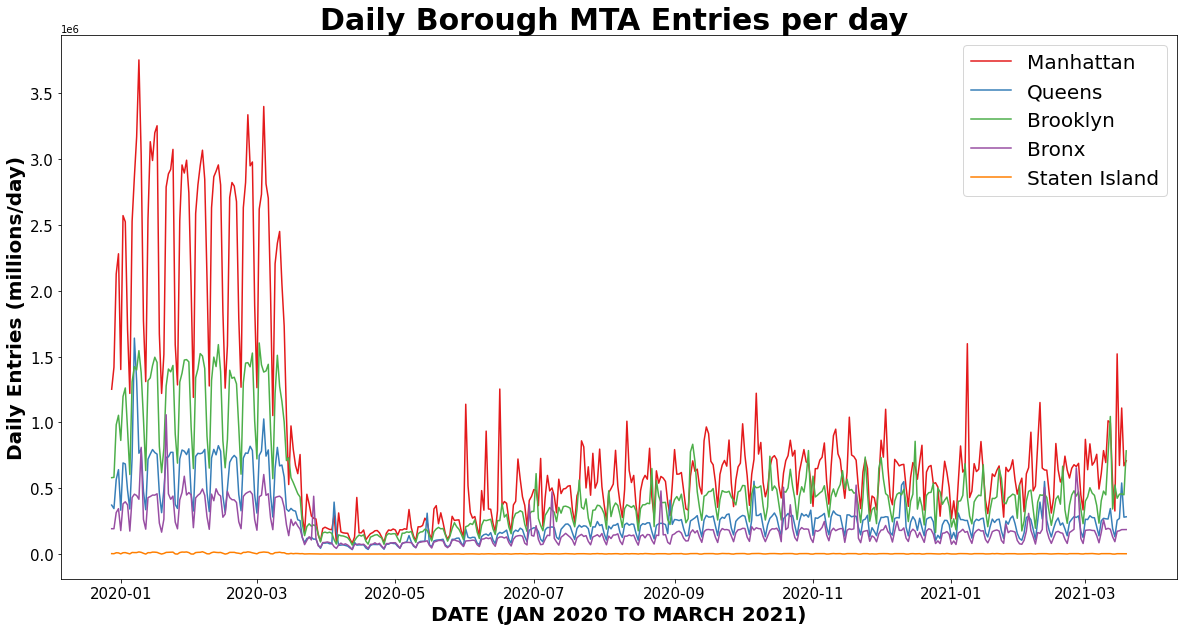

In [55]:
#Checking the general Borough trends to see if this Euclid item is still impacting data
fig, axs = plt.subplots(figsize=[20, 10])

sns.lineplot(x = "DATE",y = "DAILY_ENTRIES", hue = "BOROUGH",data = borough_daily,palette="Set1")

axs.set_xlabel('DATE (JAN 2020 TO MARCH 2021)',fontsize=20, fontweight='bold')
axs.set_ylabel('Daily Entries (millions/day)', fontsize = 20,fontweight='bold')
plt.title("Daily Borough MTA Entries per day ", fontsize = 30,fontweight='bold')
plt.legend(loc=1, prop={'size': 20})
axs.tick_params(axis='both', which='major', labelsize=15,)
axs.tick_params(axis='both', labelsize=15)


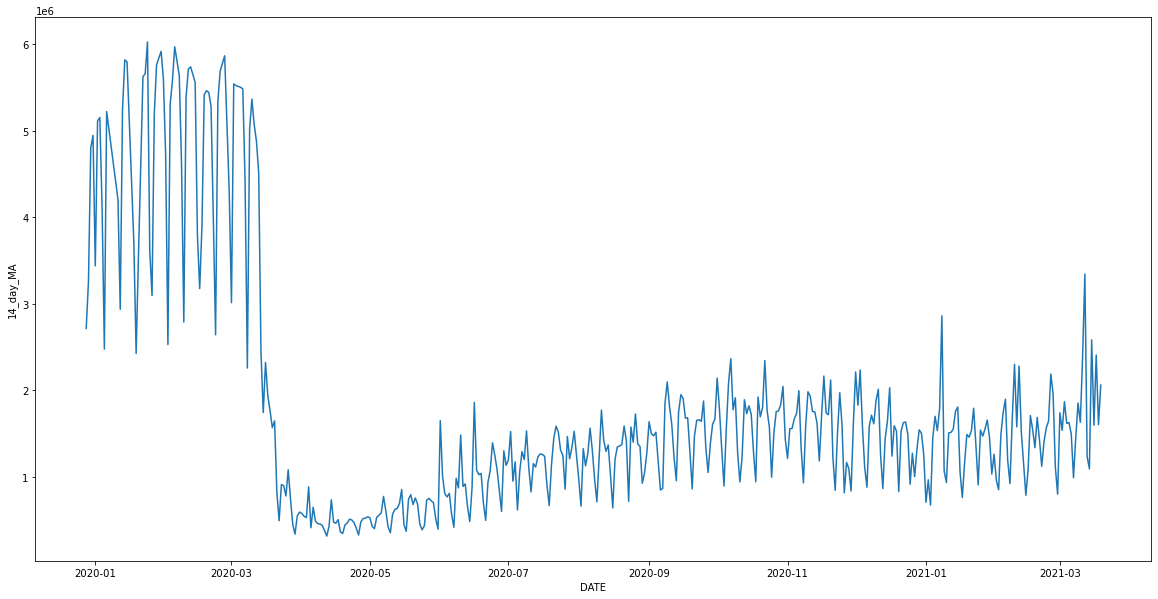

In [63]:
#Look at a 14 day moving average to smooth out the curve for total city entries
nyc_daily = mta.groupby(['DATE']).agg({'DAILY_ENTRIES': 'sum'}).sort_values(['DAILY_ENTRIES','DATE'], ascending=False).reset_index()
nyc_daily['14_day_MA'] = nyc_daily['DAILY_ENTRIES'].rolling(window=14).mean()

fig, axs = plt.subplots(figsize=[20, 10])

boroughs_first_look = sns.lineplot(x = "DATE",
                                     y = "14_day_MA",
                                     data = nyc_daily)

## Manhattan Plots

In [64]:
#Create separate dataframes for the Manhattan Borough based on seasonality/pandemic event--for chartings
man_tot = borough_daily[borough_daily['BOROUGH'] == 'Manhattan'].reset_index()
man_win_2020 = man_tot.loc[man_tot['DATE'] < '2020-3-15']
man_spr_2020 = man_tot.loc[(man_tot['DATE'] > '2020-3-15') & (man_tot['DATE'] < '2020-6-15')]
man_sum_2020 = man_tot.loc[(man_tot['DATE'] > '2020-6-15') & (man_tot['DATE'] < '2020-9-15')]
man_fall_2020 = man_tot.loc[(man_tot['DATE'] > '2020-9-15') & (man_tot['DATE'] < '2020-12-15')]
man_win_2021 = man_tot.loc[(man_tot['DATE'] > '2020-12-15')]

In [65]:
#Update Add columns based on seaonslity all in one dataframe
man1 = man_tot['DATE'].between('2019-01-01','2020-03-15')
man2 = man_tot['DATE'].between('2020-03-16','2020-06-15')
man3 = man_tot['DATE'].between('2020-06-16','2020-09-15')
man4 = man_tot['DATE'].between('2020-09-16','2020-12-15')
man5 = man_tot['DATE'].between('2020-12-16','2021-03-25')
man_tot['SEASON'] = np.select([man1, man2,man3,man4,man5], ['man_win_2020','man_spr_2020','man_sum_2020','man_fall_2020','man_win_2021'])

In [66]:
man_tot.sort_values('DATE',inplace= True)

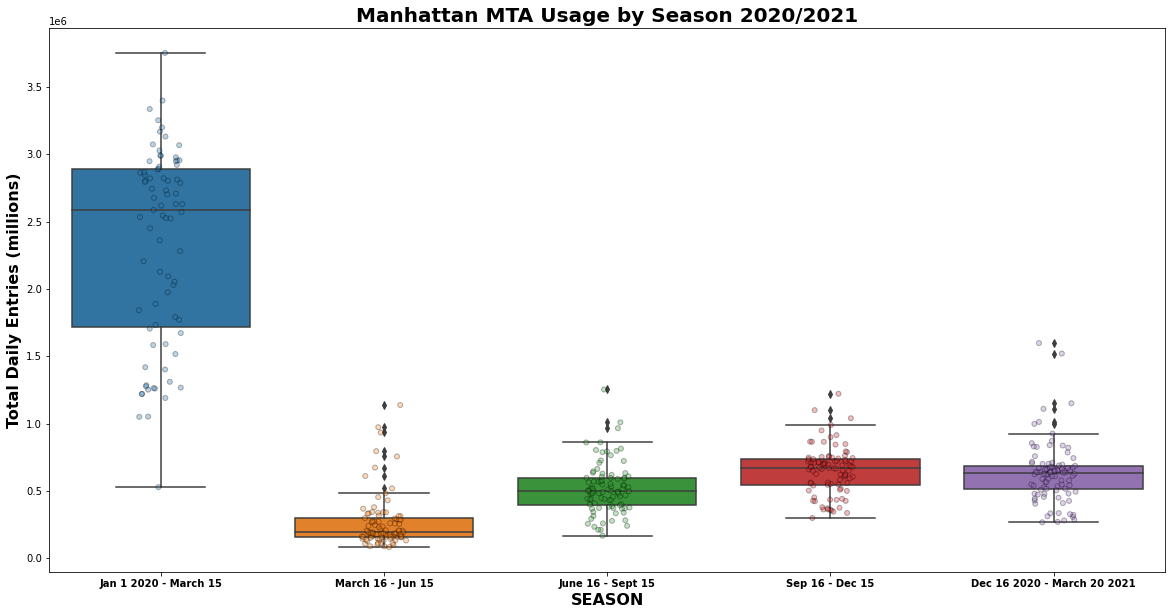

In [67]:
#Create Manhattan Boxplots across seasonlity to look at ranges/means/medians of MTA traffic
fig, axs = plt.subplots(figsize=[20, 10])

sns.stripplot(x=man_tot['SEASON'], y=man_tot['DAILY_ENTRIES'], data=pd.melt(man_tot), marker="o", alpha=0.3,jitter=True,
dodge=True,linewidth=1,edgecolor='black')
boxplot = sns.boxplot(x=man_tot['SEASON'], y=man_tot['DAILY_ENTRIES'])
boxplot.axes.set_title("Manhattan MTA Usage by Season 2020/2021", fontsize=20, fontweight='bold')

boxplot.set_xlabel("SEASON", fontsize=16, fontweight='bold')
boxplot.set_ylabel("Total Daily Entries (millions)", fontsize=16, fontweight='bold')

boxplot.set_xticklabels(['Jan 1 2020 - March 15','March 16 - Jun 15','June 16 - Sept 15','Sep 16 - Dec 15','Dec 16 2020 - March 20 2021'], fontweight='bold')

plt.show() 

In [68]:
#Set up separate dataframes to look at season and station
man_station = station_daily[station_daily['BOROUGH'] == 'Manhattan'].reset_index()
man_win_2020 = man_station.loc[man_station['DATE'] < '2020-3-15']
man_spr_2020 = man_station.loc[(man_station['DATE'] > '2020-3-15') & (man_station['DATE'] < '2020-6-15')]
man_sum_2020 = man_station.loc[(man_station['DATE'] > '2020-6-15') & (man_station['DATE'] < '2020-9-15')]
man_fall_2020 = man_station.loc[(man_station['DATE'] > '2020-9-15') & (man_station['DATE'] < '2020-12-15')]
man_win_2021 = man_station.loc[(man_station['DATE'] > '2020-12-15')]

mans1 = man_station['DATE'].between('2019-01-01','2020-03-15')
mans2 = man_station['DATE'].between('2020-03-16','2020-06-15')
mans3 = man_station['DATE'].between('2020-06-16','2020-09-15')
mans4 = man_station['DATE'].between('2020-09-16','2020-12-15')
mans5 = man_station['DATE'].between('2020-12-16','2021-03-25')
man_station['SEASON'] = np.select([mans1, mans2,mans3,mans4,mans5], ['man_win_2020','man_spr_2020','man_sum_2020','man_fall_2020','man_win_2021'])
    

In [69]:
#Add various seasons together for the manhattan stations
man_stations_szn = man_station.groupby(['STATION','SEASON']).agg({'DAILY_ENTRIES': 'median'}).sort_values(['SEASON','DAILY_ENTRIES','STATION'], ascending=False).reset_index()
man_stations_szn.head(10)

,STATION,SEASON,DAILY_ENTRIES
0,34 ST-PENN STA,man_win_2021,30226.0
1,34 ST-HERALD SQ,man_win_2021,23759.0
2,125 ST,man_win_2021,21267.5
3,GRD CNTRL-42 ST,man_win_2021,21161.5
4,42 ST-PORT AUTH,man_win_2021,20343.5
5,23 ST,man_win_2021,20324.0
6,14 ST-UNION SQ,man_win_2021,19174.5
7,96 ST,man_win_2021,16835.0
8,TIMES SQ-42 ST,man_win_2021,15084.0
9,59 ST COLUMBUS,man_win_2021,13629.0


In [70]:
#Get median traffic to look at the median traffic for busiest Manhattan stations during various time periods
man_medians=  man_stations_szn.groupby(['STATION','SEASON'])[['DAILY_ENTRIES']].median().reset_index()

In [71]:
top_man_win20 = man_medians[man_medians['SEASON'] == 'man_win_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_man_spr20 = man_medians[man_medians['SEASON'] == 'man_spr_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_man_sum20 = man_medians[man_medians['SEASON'] == 'man_sum_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_man_fall20 = man_medians[man_medians['SEASON'] == 'man_fall_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_man_win21 = man_medians[man_medians['SEASON'] == 'man_win_2021'].sort_values(by='DAILY_ENTRIES', ascending=False)

In [72]:
#rank stations by median entries for season and compare pre pandemic to beginning pandemic to see how much relative variability
pre_covid_rank = top_man_win20
pre_covid_rank["RANK_PC"] = pre_covid_rank["DAILY_ENTRIES"].rank()
pre_covid_rank.sort_values('RANK_PC', ascending=False,inplace=True)

beg_covid_rank= top_man_spr20
beg_covid_rank["RANK_BC"] = beg_covid_rank["DAILY_ENTRIES"].rank()
beg_covid_rank.sort_values('RANK_BC', ascending=False,inplace=True)

rankplot = pd.merge(pre_covid_rank, beg_covid_rank,  how='left', left_on=["STATION"], right_on = ['STATION'])

In [73]:
#Column measure rank change for station between periods
rankplot["RANK"] = rankplot.RANK_PC - rankplot.RANK_BC

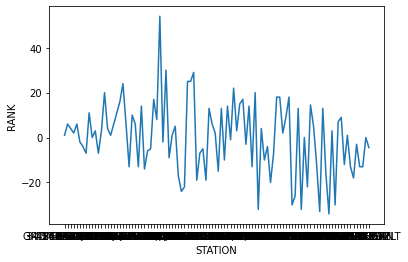

In [74]:
#initial plot just to see how variable the changes/station rank shifts are
t =sns.lineplot(data=rankplot, x="STATION", y="RANK")

Text(0.5, 1.0, 'Manhattan station rank (100 = Busiest, 1 = Slowest)')

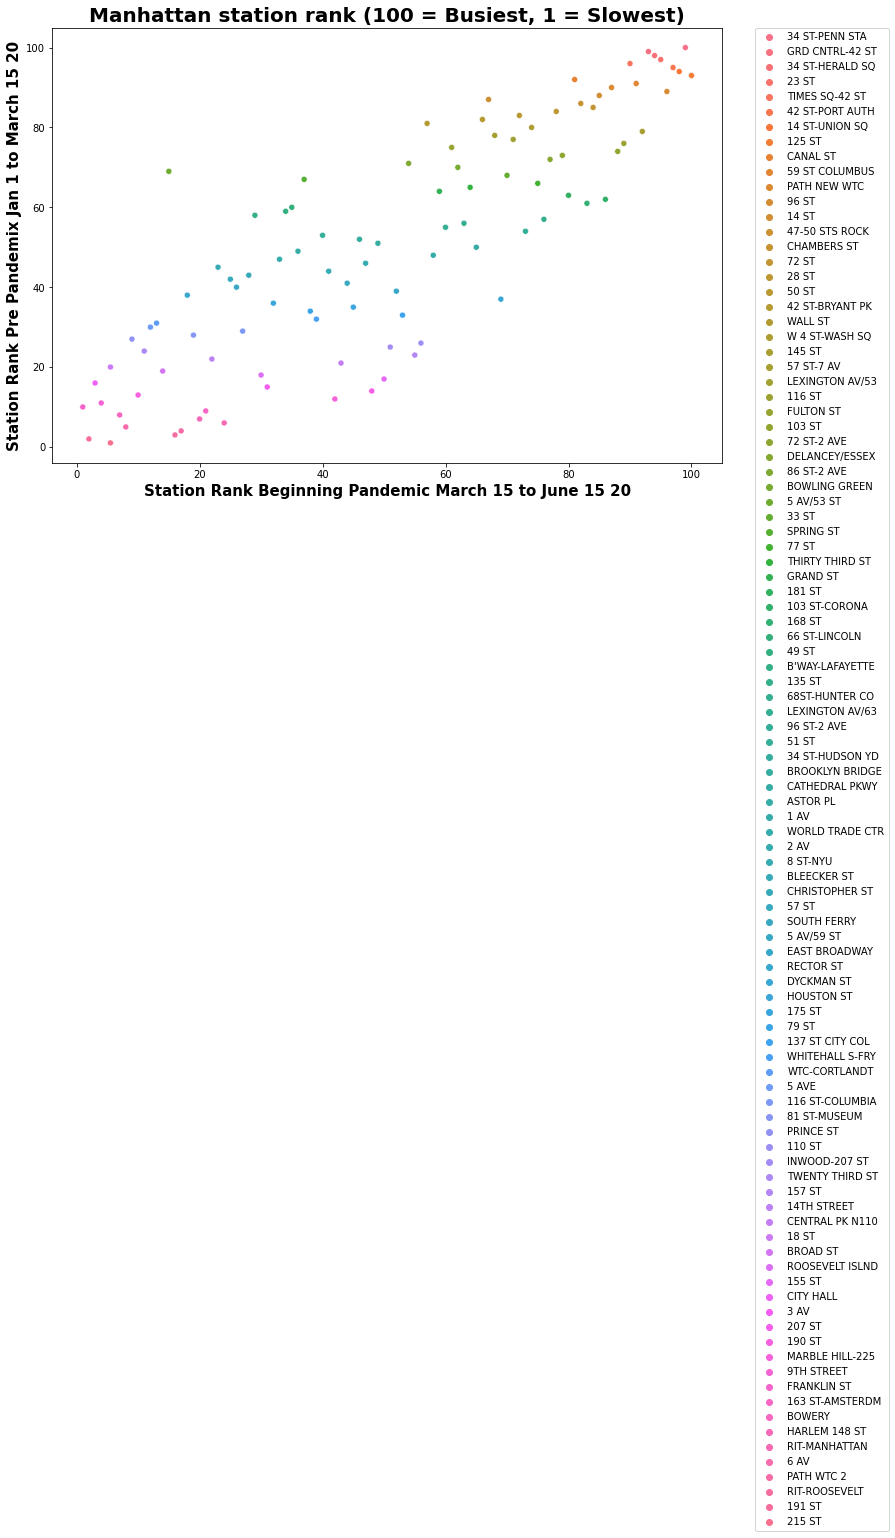

In [75]:
#100 ranking means busiest station in the borough, values closer to 1 least busy
#reltively sraight line with busiest stations remaining busiest, and least remaning least
#More invidividual station variability in the middle of the chart

plt.figure(figsize=(12, 8))
sns.scatterplot(data=rankplot, x="RANK_BC", y="RANK_PC", hue="STATION")
plt.xlabel('Station Rank Beginning Pandemic March 15 to June 15 20', fontweight= 'bold', fontsize = 15)
plt.ylabel('Station Rank Pre Pandemix Jan 1 to March 15 20', fontweight = 'bold', fontsize = 15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Manhattan station rank (100 = Busiest, 1 = Slowest)',fontweight = 'bold', fontsize = 20)

Text(0, 0.5, 'Station Name')

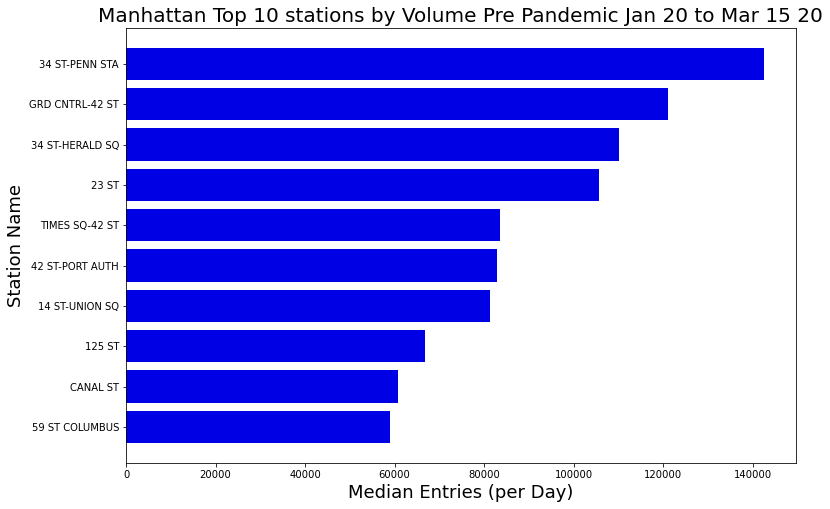

In [76]:
#Focus in on the top ten stations in Manhattan pre pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_m = top_man_win20.head(10)['DAILY_ENTRIES']
stations_m = top_man_win20.head(10)['STATION']

plt.barh(stations_m, entry_m,color = '#0000E5')
plt.gca().invert_yaxis()
plt.title('Manhattan Top 10 stations by Volume Pre Pandemic Jan 20 to Mar 15 20', size=20)
plt.xlabel('Median Entries (per Day)', size=18)
plt.ylabel('Station Name', size=18)


Text(0, 0.5, 'Station Name')

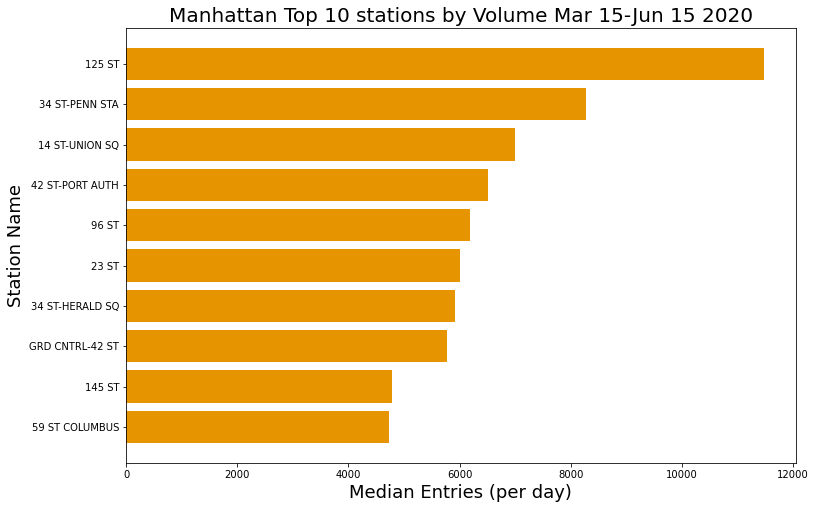

In [77]:
#Focus in on the top ten stations in Manhattan starting March 15/beginning of pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_m = top_man_spr20.head(10)['DAILY_ENTRIES']
stations_m = top_man_spr20.head(10)['STATION']

plt.barh(stations_m, entry_m,color = '#e69500')
plt.gca().invert_yaxis()
plt.title('Manhattan Top 10 stations by Volume Mar 15-Jun 15 2020', size=20)
plt.xlabel('Median Entries (per day)', size=18)
plt.ylabel('Station Name', size=18)

Text(0, 0.5, 'Station Name')

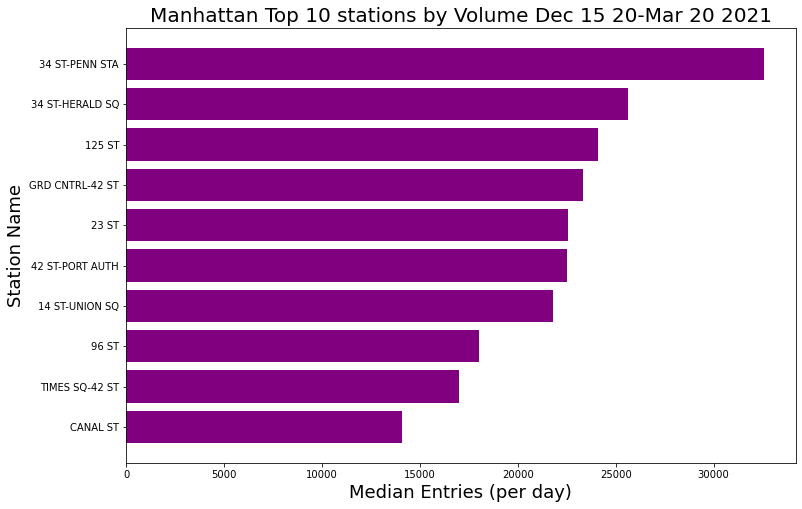

In [78]:
#Focus in on the top ten stations in Manhattan for the last three months Late December  2020 to March 2021
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_m = top_man_fall20.head(10)['DAILY_ENTRIES']
stations_m = top_man_fall20.head(10)['STATION']

plt.barh(stations_m, entry_m,color = '#800080')
plt.gca().invert_yaxis()
plt.title('Manhattan Top 10 stations by Volume Dec 15 20-Mar 20 2021', size=20)
plt.xlabel('Median Entries (per day)', size=18)
plt.ylabel('Station Name', size=18)

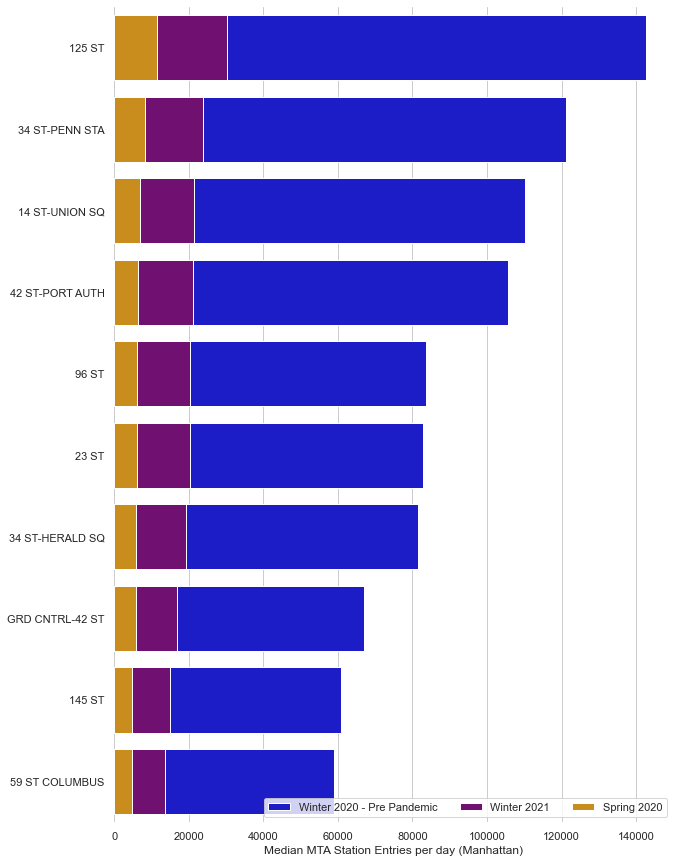

In [79]:
#Stack three time periods on top of each other for top ten stations (as set by Beginning Pandemic top 10)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 15))

# Plot the pre pandemic levels in blue
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_man_win20.head(10),label="Winter 2020 - Pre Pandemic", color="#0000E5")

# Plot the iwnter 2021 data purple
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_man_win21.head(10),label="Winter 2021", color="#800080")

# Plot the recent Beginning pandemic data in orange
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_man_spr20.head(10), label="Spring 2020", color="#e69500")

# Add a legend and informative axis label
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set( ylabel="", xlabel="Median MTA Station Entries per day (Manhattan)")
sns.despine(left=True, bottom=True)

In [80]:
man_tot  = borough_daily[borough_daily['BOROUGH'] == 'Manhattan']

## City Covid and Metro Usage

In [81]:
#Bring in New York times Covid Data, cleaned up in excel
covid = pd.read_csv('CovidData.csv')
covcol = [0] #Columns to remove
covid.drop(covid.columns[covcol],axis = 1, inplace=True) 
covid["DATE"] = pd.to_datetime(covid["DATE"])

In [82]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1940 non-null   datetime64[ns]
 1   CASES    1940 non-null   int64         
 2   BOROUGH  1940 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 45.6+ KB


In [83]:
mta2 = borough_daily.copy(deep=False)

In [84]:
mta2.shape

(2240, 3)

In [85]:
#Mereg the covid data with mta data on borough level
covid_mta = pd.merge(mta2, covid,  how='left', left_on=['BOROUGH','DATE'], right_on = ['BOROUGH','DATE'])

In [86]:
covid_mta.sort_values('DATE',inplace=True)

In [87]:
total_cases_mta = covid_mta.groupby('DATE').agg({'DAILY_ENTRIES':'sum', 'CASES':'sum'}).reset_index().sort_values('DATE')

In [88]:
total_cases_mta1 = total_cases_mta

In [89]:
total_cases_mta1.set_index('DATE')

,DAILY_ENTRIES,CASES
DATE,,
2019-12-28,2400423.0,0.0
2019-12-29,2542359.0,0.0
2019-12-30,4001112.0,0.0
2019-12-31,4329383.0,0.0
2020-01-01,2777932.0,0.0
...,...,...
2021-03-15,2376847.0,3254.0
2021-03-16,1579568.0,3061.0
2021-03-17,2294689.0,3007.0


In [90]:
total_cases_mta.sort_values("DAILY_ENTRIES")

,DATE,DAILY_ENTRIES,CASES
106,2020-04-12,221275.0,2887.0
120,2020-04-26,242326.0,1003.0
92,2020-03-29,285889.0,3562.0
113,2020-04-19,286138.0,2346.0
134,2020-05-10,288289.0,457.0
...,...,...,...
60,2020-02-26,6041192.0,0.0
11,2020-01-08,6339230.0,0.0
10,2020-01-07,6392408.0,0.0
67,2020-03-04,6427102.0,5.0


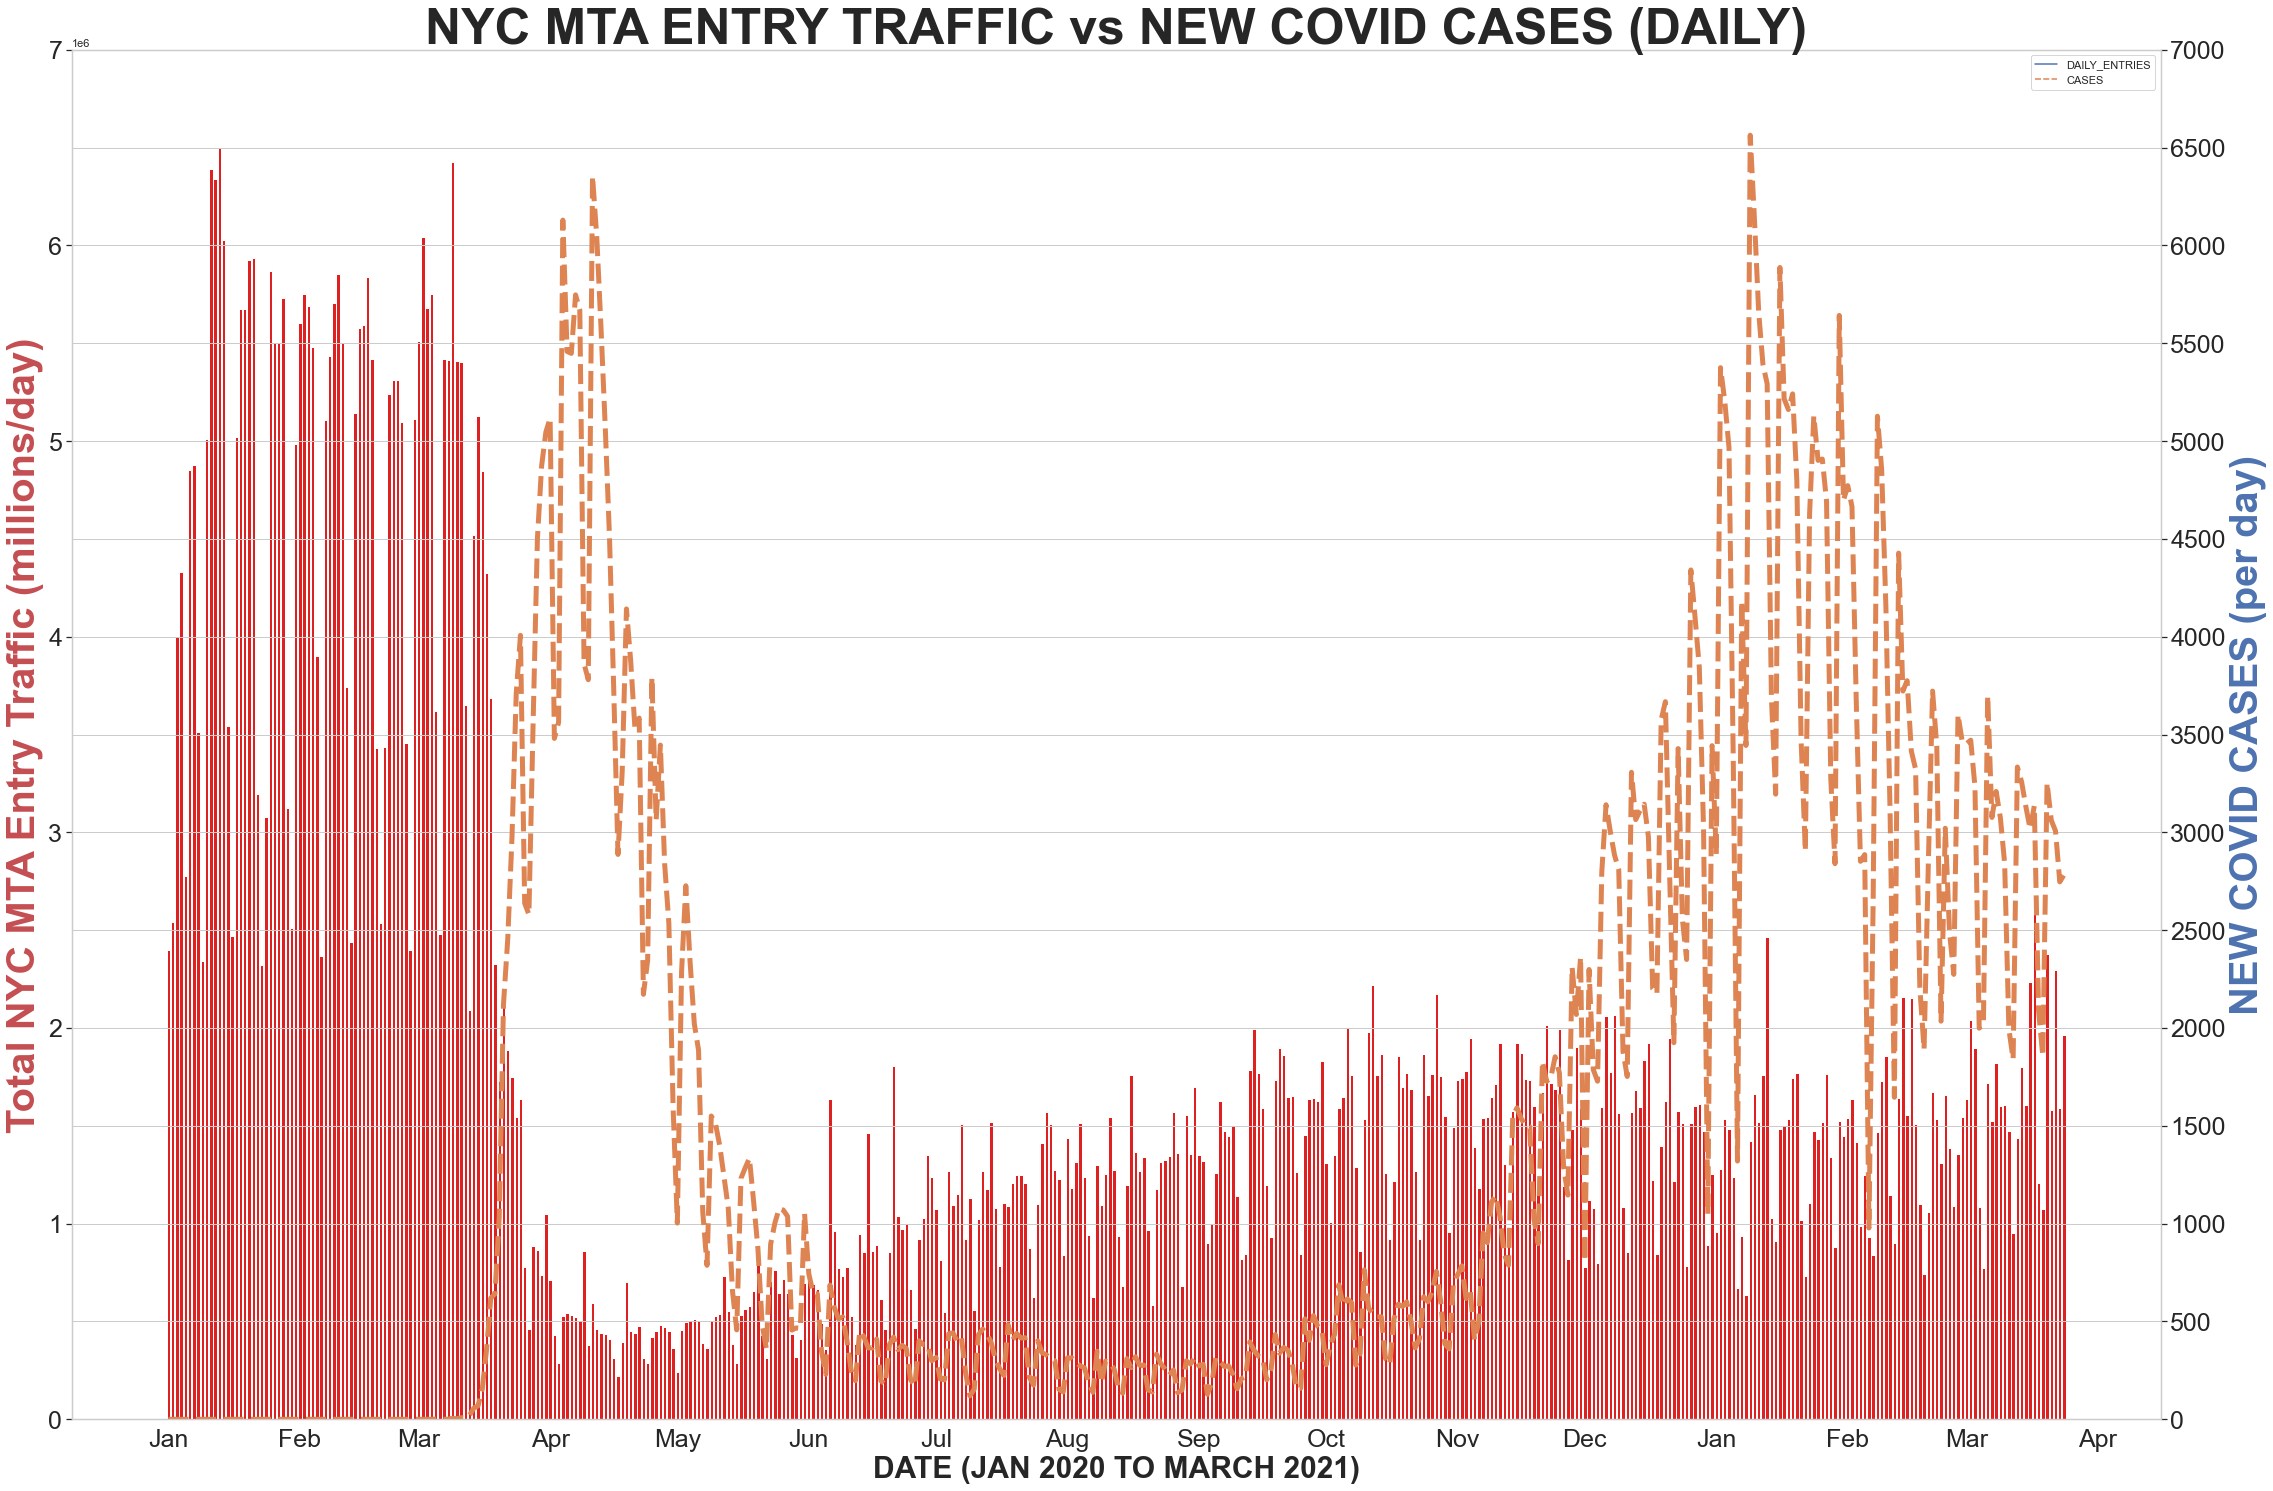

In [91]:
#Plotting city wide covid vs daily entries, keep in mind covid cases werent tracked until march
#Use bar chart for entry data and covid data as a line chart

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt

fig, ax1 = plt.subplots(figsize=[30, 20],sharex=True) # initializes figure and plots
ax2 = ax1.twinx() # applies twinx ax2 to ax1, for the secondary y axis. 
sns.color_palette()
sns.barplot(x=total_cases_mta1["DATE"],y=total_cases_mta1["DAILY_ENTRIES"], ax = ax1, color = 'red',data = total_cases_mta1) # plots the first set of data, and sets it to ax1. 
sns.lineplot(ax = ax2, data = total_cases_mta1,linewidth = 5, color='b') 

#Source for x-axis help to make dates readable: https://stackoverflow.com/questions/53863600/reduce-number-of-ticks-on-x-axis-where-labels-are-date
plt.gca().xaxis.set_major_locator(mdates.DayLocator((1)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()

ax1.set_xlabel('DATE (JAN 2020 TO MARCH 2021)',fontsize=30, fontweight='bold')
ax1.set_ylabel('Total NYC MTA Entry Traffic (millions/day)', fontsize = 40,fontweight='bold', color='r')
ax2.set_ylabel('NEW COVID CASES (per day)', fontsize = 40,fontweight='bold',color='b')
ax1.set_ylim([0,7000000])
ax2.set_ylim([0,2000])
ax2.set_yticks(np.arange(0,7500,500))
plt.rcParams["font.weight"] = "bold"
ax1.tick_params(axis='both', which='major', labelsize=25,)
ax2.tick_params(axis='both', labelsize=25)
plt.title("NYC MTA ENTRY TRAFFIC vs NEW COVID CASES (DAILY)", fontsize = 50,fontweight='bold')

plt.show(); # shows the plot. 

In [92]:
#Look at rough correlation/relationship between entries and cases count
only_covid_cases_mta = total_cases_mta[total_cases_mta["DATE"] > "2020-03-01"]

Text(34.25, 0.5, 'Daily Entries (Millions) Since March 15 2020')

<Figure size 1800x1440 with 0 Axes>

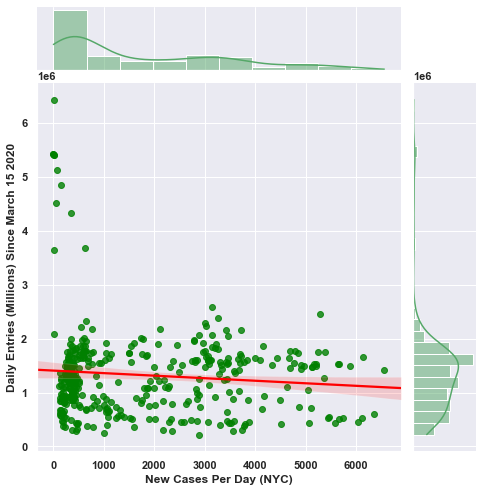

In [93]:
plt.figure(figsize=(25, 20))
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="CASES", y="DAILY_ENTRIES", data=only_covid_cases_mta, kind="reg", truncate=False,color='g', scatter_kws={"color": "green"}, line_kws={"color": "red"}, height=7)
g.ax_joint.set_xlabel('New Cases Per Day (NYC)', fontweight='bold')
g.ax_joint.set_ylabel('Daily Entries (Millions) Since March 15 2020', fontweight='bold')

In [94]:
covid_mta.sort_values("DAILY_ENTRIES", ascending = False,inplace=True)

Text(0.5, 1.0, 'Cases by Borough')

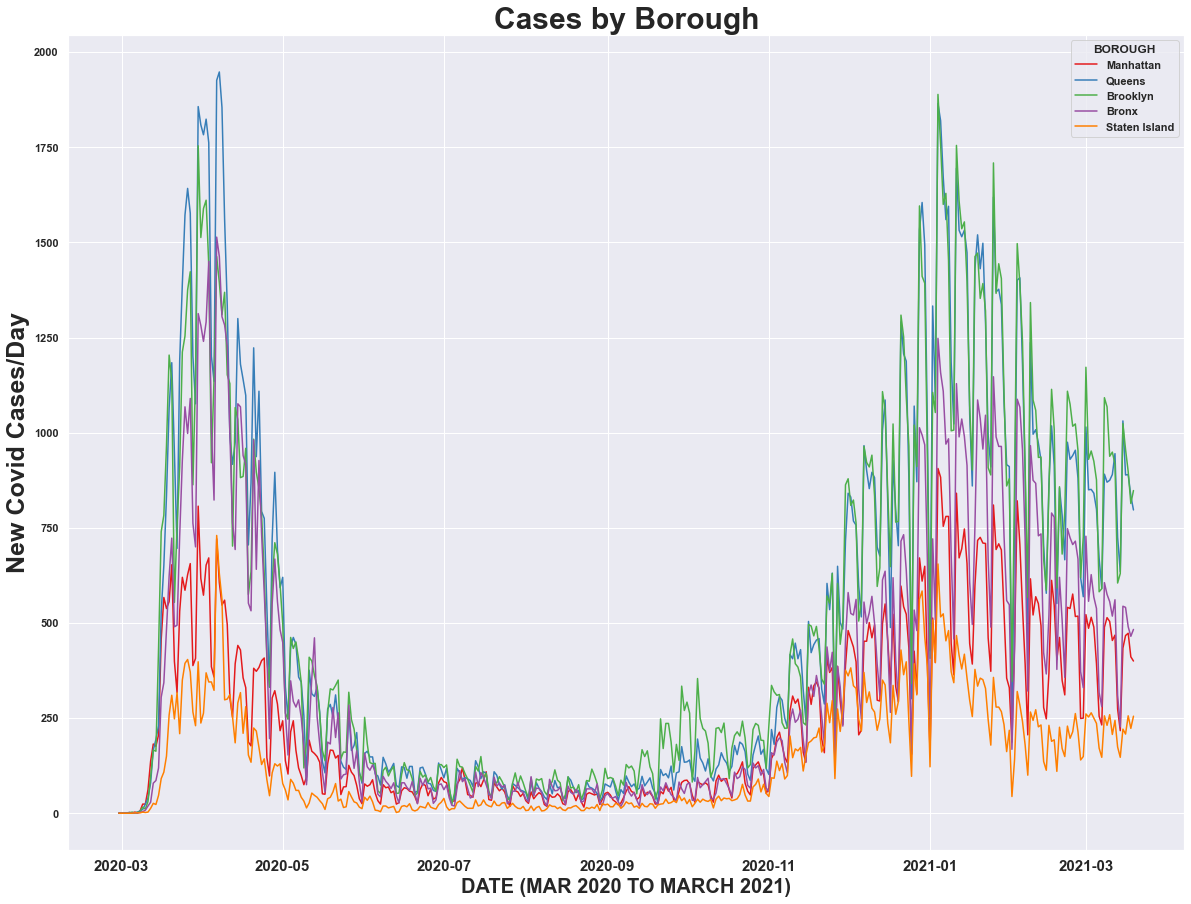

In [95]:
plt.figure(figsize=(20, 15))
# Sort the dataframe by target
sns.lineplot(y="CASES",x="DATE",hue="BOROUGH",data=covid_mta,palette="Set1")
plt.plot(fillstyle="full")
plt.xlabel('DATE (MAR 2020 TO MARCH 2021)',fontsize=20, fontweight='bold')
plt.ylabel('New Covid Cases/Day', fontsize = 25,fontweight='bold')
plt.xticks(fontsize = 15)
plt.title("Cases by Borough", fontsize = 30,fontweight='bold')


## Brooklyn

In [96]:
#Create separate dataframes for the Brooklyn Borough based on seasonality/pandemic event--for chartings
bnk_tot = borough_daily[borough_daily['BOROUGH'] == 'Brooklyn'].reset_index()
bnk_win_2020 = bnk_tot.loc[bnk_tot['DATE'] < '2020-3-15']
bnk_spr_2020 = bnk_tot.loc[(bnk_tot['DATE'] > '2020-3-15') & (bnk_tot['DATE'] < '2020-6-15')]
bnk_sum_2020 = bnk_tot.loc[(bnk_tot['DATE'] > '2020-6-15') & (bnk_tot['DATE'] < '2020-9-15')]
bnk_fall_2020 = bnk_tot.loc[(bnk_tot['DATE'] > '2020-9-15') & (bnk_tot['DATE'] < '2020-12-15')]
bnk_win_2021 = bnk_tot.loc[(bnk_tot['DATE'] > '2020-12-15')]

In [97]:
#Update Add columns based on seaonslity all in one dataframe
bnk1 = bnk_tot['DATE'].between('2019-01-01','2020-03-15')
bnk2 = bnk_tot['DATE'].between('2020-03-16','2020-06-15')
bnk3 = bnk_tot['DATE'].between('2020-06-16','2020-09-15')
bnk4 = bnk_tot['DATE'].between('2020-09-16','2020-12-15')
bnk5 = bnk_tot['DATE'].between('2020-12-16','2021-03-25')
bnk_tot['SEASON'] = np.select([bnk1, bnk2,bnk3,bnk4,bnk5], ['bnk_win_2020','bnk_spr_2020','bnk_sum_2020','bnk_fall_2020','bnk_win_2021'])


In [98]:
bnk_tot.sort_values('DATE',inplace= True)
bnk_tot

,index,BOROUGH,DATE,DAILY_ENTRIES,SEASON
100,388,Brooklyn,2019-12-28,580400.0,bnk_win_2020
98,386,Brooklyn,2019-12-29,582658.0,bnk_win_2020
54,149,Brooklyn,2019-12-30,982213.0,bnk_win_2020
49,136,Brooklyn,2019-12-31,1053952.0,bnk_win_2020
62,168,Brooklyn,2020-01-01,863097.0,bnk_win_2020
...,...,...,...,...,...
209,645,Brooklyn,2021-03-15,423908.0,bnk_win_2021
171,559,Brooklyn,2021-03-16,454941.0,bnk_win_2021
165,547,Brooklyn,2021-03-17,457083.0,bnk_win_2021
173,567,Brooklyn,2021-03-18,450283.0,bnk_win_2021


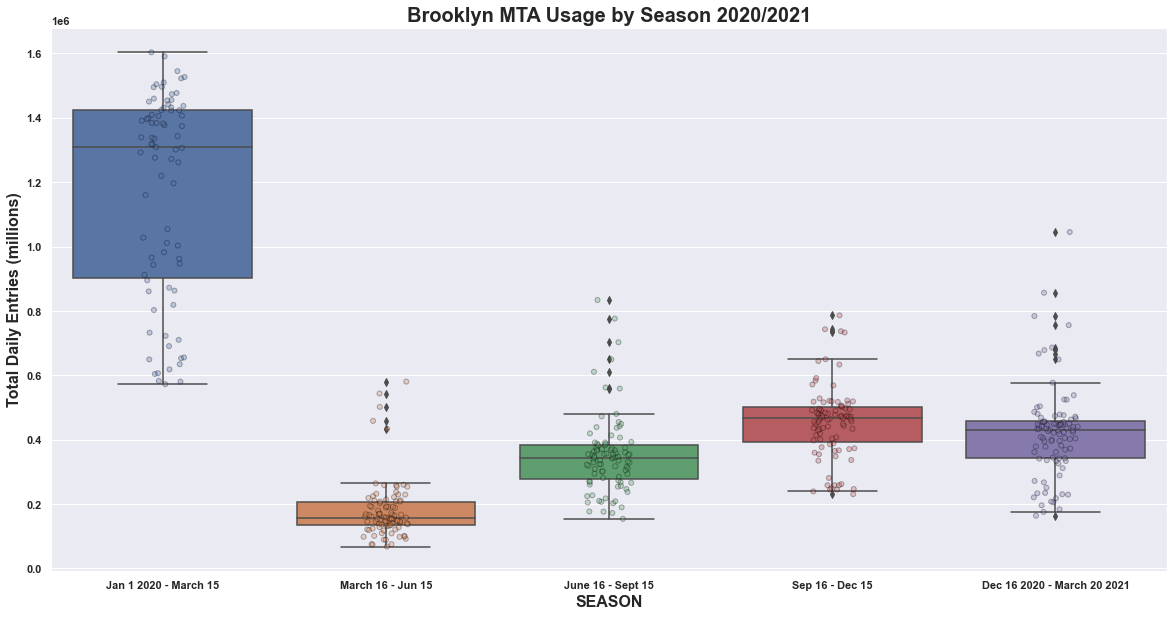

In [99]:
#Create Brooklyn Boxplots across seasonlity to look at ranges/means/medians of MTA traffic
fig, axs = plt.subplots(figsize=[20, 10])

sns.stripplot(x=bnk_tot['SEASON'], y=bnk_tot['DAILY_ENTRIES'], data=pd.melt(bnk_tot), marker="o", alpha=0.3,jitter=True,
dodge=True,linewidth=1,edgecolor='black')
boxplot = sns.boxplot(x=bnk_tot['SEASON'], y=bnk_tot['DAILY_ENTRIES'])
boxplot.axes.set_title("Brooklyn MTA Usage by Season 2020/2021", fontsize=20, fontweight='bold')

boxplot.set_xlabel("SEASON", fontsize=16, fontweight='bold')
boxplot.set_ylabel("Total Daily Entries (millions)", fontsize=16, fontweight='bold')

boxplot.set_xticklabels(['Jan 1 2020 - March 15','March 16 - Jun 15','June 16 - Sept 15','Sep 16 - Dec 15','Dec 16 2020 - March 20 2021'], fontweight='bold')

plt.show() 

In [100]:
bnk_station = station_daily[station_daily['BOROUGH'] == 'Brooklyn'].reset_index()
bnk_win_2020 = bnk_station.loc[bnk_station['DATE'] < '2020-3-15']
bnk_spr_2020 = bnk_station.loc[(bnk_station['DATE'] > '2020-3-15') & (bnk_station['DATE'] < '2020-6-15')]
bnk_sum_2020 = bnk_station.loc[(bnk_station['DATE'] > '2020-6-15') & (bnk_station['DATE'] < '2020-9-15')]
bnk_fall_2020 = bnk_station.loc[(bnk_station['DATE'] > '2020-9-15') & (bnk_station['DATE'] < '2020-12-15')]
bnk_win_2021 = bnk_station.loc[(bnk_station['DATE'] > '2020-12-15')]

bnks1 = bnk_station['DATE'].between('2019-01-01','2020-03-15')
bnks2 = bnk_station['DATE'].between('2020-03-16','2020-06-15')
bnks3 = bnk_station['DATE'].between('2020-06-16','2020-09-15')
bnks4 = bnk_station['DATE'].between('2020-09-16','2020-12-15')
bnks5 = bnk_station['DATE'].between('2020-12-16','2021-03-25')
bnk_station['SEASON'] = np.select([bnks1, bnks2,bnks3,bnks4,bnks5], ['bnk_win_2020','bnk_spr_2020','bnk_sum_2020','bnk_fall_2020','bnk_win_2021'])


In [101]:
bnk_station

,index,BOROUGH,STATION,DATE,DAILY_ENTRIES,SEASON
0,27270,Brooklyn,15 ST-PROSPECT,2019-12-28,2266.0,bnk_win_2020
1,27271,Brooklyn,15 ST-PROSPECT,2019-12-29,2269.0,bnk_win_2020
2,27272,Brooklyn,15 ST-PROSPECT,2019-12-30,3255.0,bnk_win_2020
3,27273,Brooklyn,15 ST-PROSPECT,2019-12-31,6213.0,bnk_win_2020
4,27274,Brooklyn,15 ST-PROSPECT,2020-01-01,2793.0,bnk_win_2020
...,...,...,...,...,...,...
59102,86372,Brooklyn,YORK ST,2021-03-15,2245.0,bnk_win_2021
59103,86373,Brooklyn,YORK ST,2021-03-16,2422.0,bnk_win_2021
59104,86374,Brooklyn,YORK ST,2021-03-17,2256.0,bnk_win_2021
59105,86375,Brooklyn,YORK ST,2021-03-18,2671.0,bnk_win_2021


In [102]:
#Add various seasons together for the Brooklyn stations
bnk_stations_szn = bnk_station.groupby(['STATION','SEASON']).agg({'DAILY_ENTRIES': 'median'}).sort_values(['SEASON','DAILY_ENTRIES','STATION'], ascending=False).reset_index()
bnk_stations_szn.head(10)

,STATION,SEASON,DAILY_ENTRIES
0,86 ST,bnk_win_2021,21799.5
1,59 ST,bnk_win_2021,17812.0
2,CHURCH AV,bnk_win_2021,12253.0
3,FULTON ST,bnk_win_2021,11424.5
4,ATL AV-BARCLAY,bnk_win_2021,10626.0
5,KINGS HWY,bnk_win_2021,9877.5
6,DEKALB AV,bnk_win_2021,8903.5
7,CROWN HTS-UTICA,bnk_win_2021,8868.5
8,JAY ST-METROTEC,bnk_win_2021,7913.5
9,8 AV,bnk_win_2021,7531.5


In [103]:
#Get median traffic to look at the median traffic for busiest Brooklyn stations during various time periods
bnk_medians=  bnk_stations_szn.groupby(['STATION','SEASON'])[['DAILY_ENTRIES']].median().reset_index()

top_bnk_win20 = bnk_medians[bnk_medians['SEASON'] == 'bnk_win_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_bnk_spr20 = bnk_medians[bnk_medians['SEASON'] == 'bnk_spr_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_bnk_sum20 = bnk_medians[bnk_medians['SEASON'] == 'bnk_sum_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_bnk_fall20 = bnk_medians[bnk_medians['SEASON'] == 'bnk_fall_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_bnk_win21 = bnk_medians[bnk_medians['SEASON'] == 'bnk_win_2021'].sort_values(by='DAILY_ENTRIES', ascending=False)


Text(0, 0.5, 'Station Name')

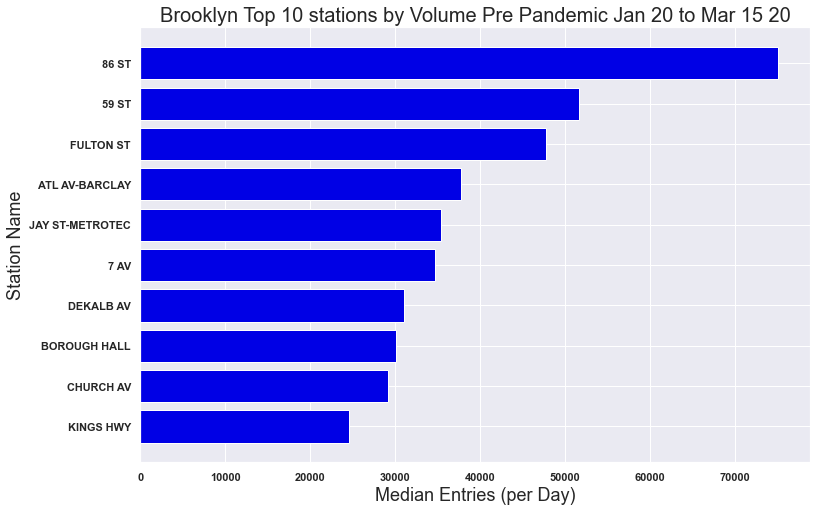

In [104]:
#Focus in on the top ten stations in Brooklyn pre pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_b = top_bnk_win20.head(10)['DAILY_ENTRIES']
stations_b = top_bnk_win20.head(10)['STATION']

plt.barh(stations_b, entry_b,color = '#0000E5')
plt.gca().invert_yaxis()
plt.title('Brooklyn Top 10 stations by Volume Pre Pandemic Jan 20 to Mar 15 20', size=20)
plt.xlabel('Median Entries (per Day)', size=18)
plt.ylabel('Station Name', size=18)

Text(0, 0.5, 'Station Name')

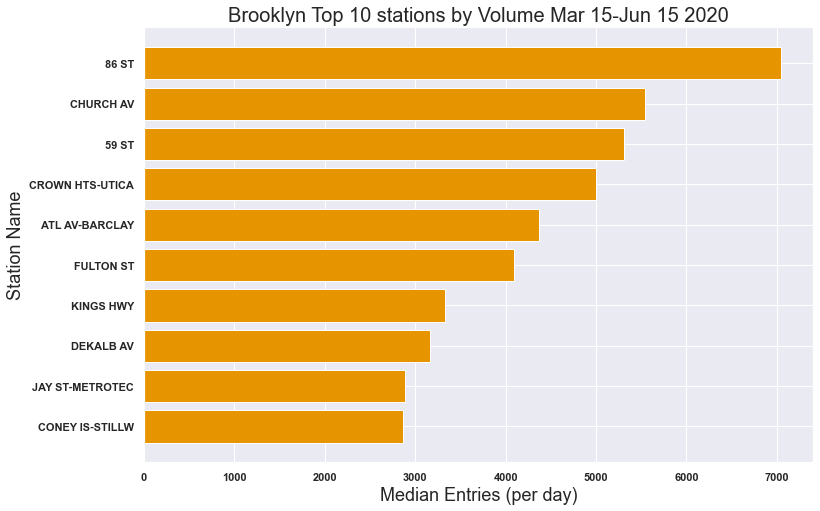

In [105]:
#Focus in on the top ten stations in Brooklyn starting March 15/beginning of pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_b = top_bnk_spr20.head(10)['DAILY_ENTRIES']
stations_b = top_bnk_spr20.head(10)['STATION']

plt.barh(stations_b, entry_b,color = '#e69500')
plt.gca().invert_yaxis()
plt.title('Brooklyn Top 10 stations by Volume Mar 15-Jun 15 2020', size=20)
plt.xlabel('Median Entries (per day)', size=18)
plt.ylabel('Station Name', size=18)

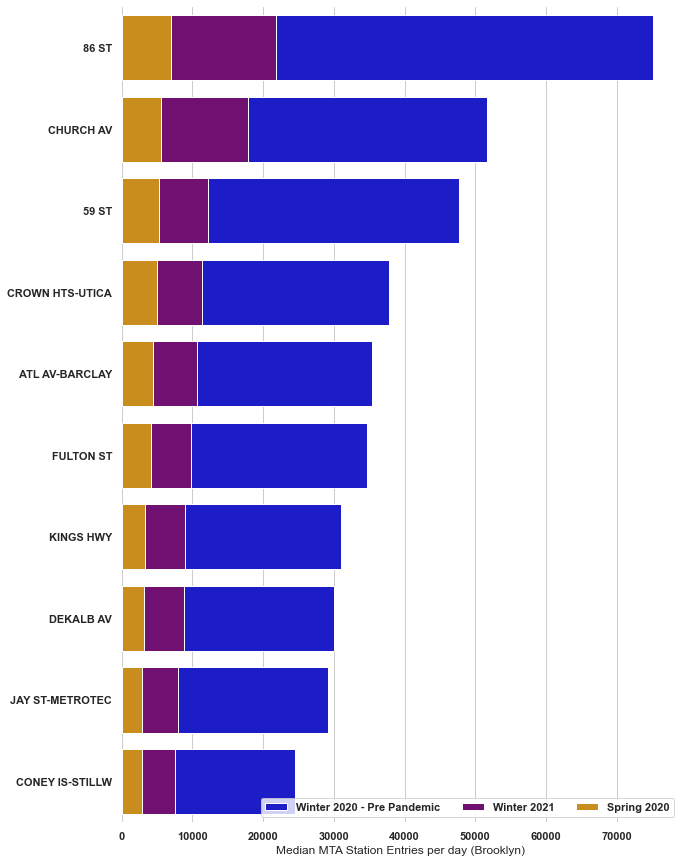

In [106]:
#Stack three time periods on top of each other for top ten stations (as set by Beginning Pandemic top 10)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 15))

# Plot the pre pandemic levels in blue
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_bnk_win20.head(10),label="Winter 2020 - Pre Pandemic", color="#0000E5")

# Plot the iwnter 2021 data purple
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_bnk_win21.head(10),label="Winter 2021", color="#800080")

# Plot the recent Beginning pandemic data in orange
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_bnk_spr20.head(10), label="Spring 2020", color="#e69500")

# Add a legend and informative axis label
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set( ylabel="", xlabel="Median MTA Station Entries per day (Brooklyn)")
sns.despine(left=True, bottom=True)


While Brooklyn is pretty close to Manhattan at nearly at 10x decrease from pre pandemic to preak beginning pandemic, it is slightly better closer to 9x and it also appears on a percentage basis to be recovering a bit better for their top two stations (purple) compare to the top couple of stations for Manhattan

## Queens

In [107]:
#Create separate dataframes for the Queens Borough based on seasonality/pandemic event--for chartings
qun_tot = borough_daily[borough_daily['BOROUGH'] == 'Queens'].reset_index()
qun_win_2020 = qun_tot.loc[qun_tot['DATE'] < '2020-3-15']
qun_spr_2020 = qun_tot.loc[(qun_tot['DATE'] > '2020-3-15') & (qun_tot['DATE'] < '2020-6-15')]
qun_sum_2020 = qun_tot.loc[(qun_tot['DATE'] > '2020-6-15') & (qun_tot['DATE'] < '2020-9-15')]
qun_fall_2020 = qun_tot.loc[(qun_tot['DATE'] > '2020-9-15') & (qun_tot['DATE'] < '2020-12-15')]
qun_win_2021 = qun_tot.loc[(qun_tot['DATE'] > '2020-12-15')]


In [108]:
#Update Add columns based on seaonslity all in one dataframe
qun1 = qun_tot['DATE'].between('2019-01-01','2020-03-15')
qun2 = qun_tot['DATE'].between('2020-03-16','2020-06-15')
qun3 = qun_tot['DATE'].between('2020-06-16','2020-09-15')
qun4 = qun_tot['DATE'].between('2020-09-16','2020-12-15')
qun5 = qun_tot['DATE'].between('2020-12-16','2021-03-25')
qun_tot['SEASON'] = np.select([qun1, qun2,qun3,qun4,qun5], ['qun_win_2020','qun_spr_2020','qun_sum_2020','qun_fall_2020','qun_win_2021'])



In [109]:
qun_tot.sort_values('DATE',inplace= True)
qun_tot

,index,BOROUGH,DATE,DAILY_ENTRIES,SEASON
72,716,Queens,2019-12-28,371968.0,qun_win_2020
76,757,Queens,2019-12-29,345512.0,qun_win_2020
51,400,Queens,2019-12-30,565965.0,qun_win_2020
49,337,Queens,2019-12-31,641087.0,qun_win_2020
81,790,Queens,2020-01-01,332954.0,qun_win_2020
...,...,...,...,...,...
193,980,Queens,2021-03-15,256749.0,qun_win_2021
163,925,Queens,2021-03-16,270929.0,qun_win_2021
55,422,Queens,2021-03-17,539898.0,qun_win_2021
141,895,Queens,2021-03-18,280405.0,qun_win_2021


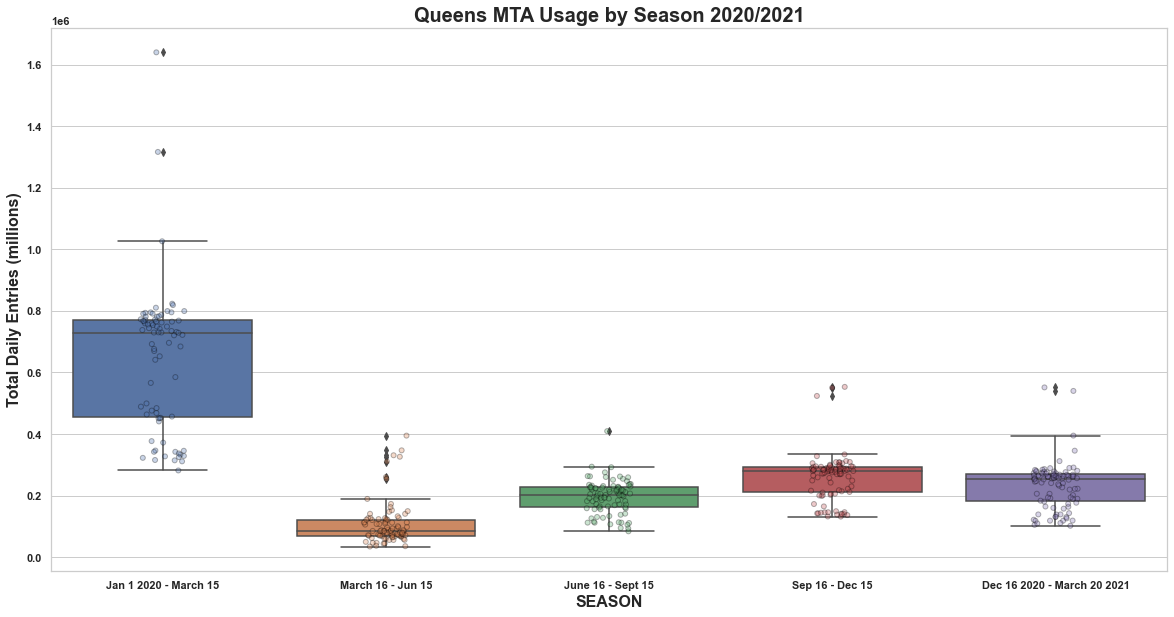

In [110]:
#Create Queens Boxplots across seasonlity to look at ranges/means/medians of MTA traffic
fig, axs = plt.subplots(figsize=[20, 10])

sns.stripplot(x=qun_tot['SEASON'], y=qun_tot['DAILY_ENTRIES'], data=pd.melt(qun_tot), marker="o", alpha=0.3,jitter=True,
dodge=True,linewidth=1,edgecolor='black')
boxplot = sns.boxplot(x=qun_tot['SEASON'], y=qun_tot['DAILY_ENTRIES'])
boxplot.axes.set_title("Queens MTA Usage by Season 2020/2021", fontsize=20, fontweight='bold')

boxplot.set_xlabel("SEASON", fontsize=16, fontweight='bold')
boxplot.set_ylabel("Total Daily Entries (millions)", fontsize=16, fontweight='bold')

boxplot.set_xticklabels(['Jan 1 2020 - March 15','March 16 - Jun 15','June 16 - Sept 15','Sep 16 - Dec 15','Dec 16 2020 - March 20 2021'], fontweight='bold')

plt.show() 



In [111]:
qun_station = station_daily[station_daily['BOROUGH'] == 'Queens'].reset_index()
qun_win_2020 = qun_station.loc[qun_station['DATE'] < '2020-3-15']
qun_spr_2020 = qun_station.loc[(qun_station['DATE'] > '2020-3-15') & (qun_station['DATE'] < '2020-6-15')]
qun_sum_2020 = qun_station.loc[(qun_station['DATE'] > '2020-6-15') & (qun_station['DATE'] < '2020-9-15')]
qun_fall_2020 = qun_station.loc[(qun_station['DATE'] > '2020-9-15') & (qun_station['DATE'] < '2020-12-15')]
qun_win_2021 = qun_station.loc[(qun_station['DATE'] > '2020-12-15')]

quns1 = qun_station['DATE'].between('2019-01-01','2020-03-15')
quns2 = qun_station['DATE'].between('2020-03-16','2020-06-15')
quns3 = qun_station['DATE'].between('2020-06-16','2020-09-15')
quns4 = qun_station['DATE'].between('2020-09-16','2020-12-15')
quns5 = qun_station['DATE'].between('2020-12-16','2021-03-25')
qun_station['SEASON'] = np.select([quns1, quns2,quns3,quns4,quns5], ['qun_win_2020','qun_spr_2020','qun_sum_2020','qun_fall_2020','qun_win_2021'])

In [112]:
qun_station

,index,BOROUGH,STATION,DATE,DAILY_ENTRIES,SEASON
0,131121,Queens,104 ST,2019-12-28,1267.0,qun_win_2020
1,131122,Queens,104 ST,2019-12-29,1478.0,qun_win_2020
2,131123,Queens,104 ST,2019-12-30,3256.0,qun_win_2020
3,131124,Queens,104 ST,2019-12-31,3295.0,qun_win_2020
4,131125,Queens,104 ST,2020-01-01,1430.0,qun_win_2020
...,...,...,...,...,...,...
33991,165112,Queens,WOODHAVEN BLVD,2021-03-15,9943.0,qun_win_2021
33992,165113,Queens,WOODHAVEN BLVD,2021-03-16,7887.0,qun_win_2021
33993,165114,Queens,WOODHAVEN BLVD,2021-03-17,9549.0,qun_win_2021
33994,165115,Queens,WOODHAVEN BLVD,2021-03-18,10077.0,qun_win_2021


In [113]:
#Add various seasons together for the Queens stations
qun_stations_szn = qun_station.groupby(['STATION','SEASON']).agg({'DAILY_ENTRIES': 'median'}).sort_values(['SEASON','DAILY_ENTRIES','STATION'], ascending=False).reset_index()
qun_stations_szn.head(10)


,STATION,SEASON,DAILY_ENTRIES
0,FLUSHING-MAIN,qun_win_2021,19173.5
1,JKSN HT-ROOSVLT,qun_win_2021,17521.0
2,JAMAICA CENTER,qun_win_2021,10730.5
3,JUNCTION BLVD,qun_win_2021,10455.0
4,KEW GARDENS,qun_win_2021,8064.5
5,WOODHAVEN BLVD,qun_win_2021,7819.5
6,SUTPHIN-ARCHER,qun_win_2021,7707.0
7,JAMAICA 179 ST,qun_win_2021,7454.5
8,90 ST-ELMHURST,qun_win_2021,7433.5
9,FOREST HILLS 71,qun_win_2021,7336.0


In [114]:
#Get median traffic to look at the median traffic for busiest Queens stations during various time periods
qun_medians=  qun_stations_szn.groupby(['STATION','SEASON'])[['DAILY_ENTRIES']].median().reset_index()

top_qun_win20 = qun_medians[qun_medians['SEASON'] == 'qun_win_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_qun_spr20 = qun_medians[qun_medians['SEASON'] == 'qun_spr_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_qun_sum20 = qun_medians[qun_medians['SEASON'] == 'qun_sum_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_qun_fall20 = qun_medians[qun_medians['SEASON'] == 'qun_fall_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_qun_win21 = qun_medians[qun_medians['SEASON'] == 'qun_win_2021'].sort_values(by='DAILY_ENTRIES', ascending=False)


Text(0, 0.5, 'Station Name')

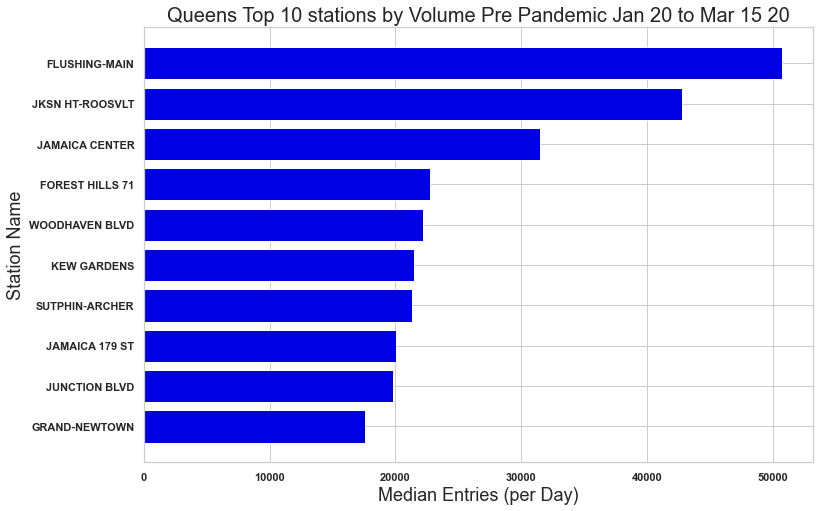

In [115]:
#Focus in on the top ten stations in Queens pre pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_b = top_qun_win20.head(10)['DAILY_ENTRIES']
stations_b = top_qun_win20.head(10)['STATION']

plt.barh(stations_b, entry_b,color = '#0000E5')
plt.gca().invert_yaxis()
plt.title('Queens Top 10 stations by Volume Pre Pandemic Jan 20 to Mar 15 20', size=20)
plt.xlabel('Median Entries (per Day)', size=18)
plt.ylabel('Station Name', size=18)

Text(0, 0.5, 'Station Name')

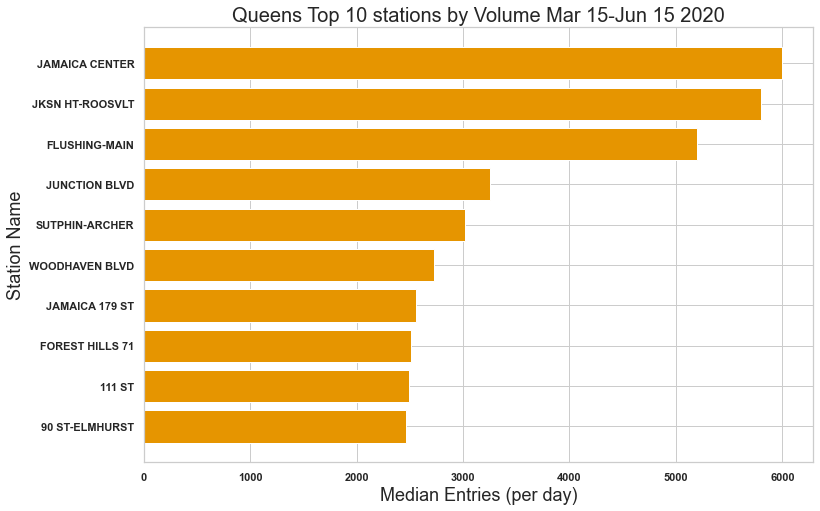

In [116]:
#Focus in on the top ten stations in Queens starting March 15/beginning of pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_b = top_qun_spr20.head(10)['DAILY_ENTRIES']
stations_b = top_qun_spr20.head(10)['STATION']

plt.barh(stations_b, entry_b,color = '#e69500')
plt.gca().invert_yaxis()
plt.title('Queens Top 10 stations by Volume Mar 15-Jun 15 2020', size=20)
plt.xlabel('Median Entries (per day)', size=18)
plt.ylabel('Station Name', size=18)


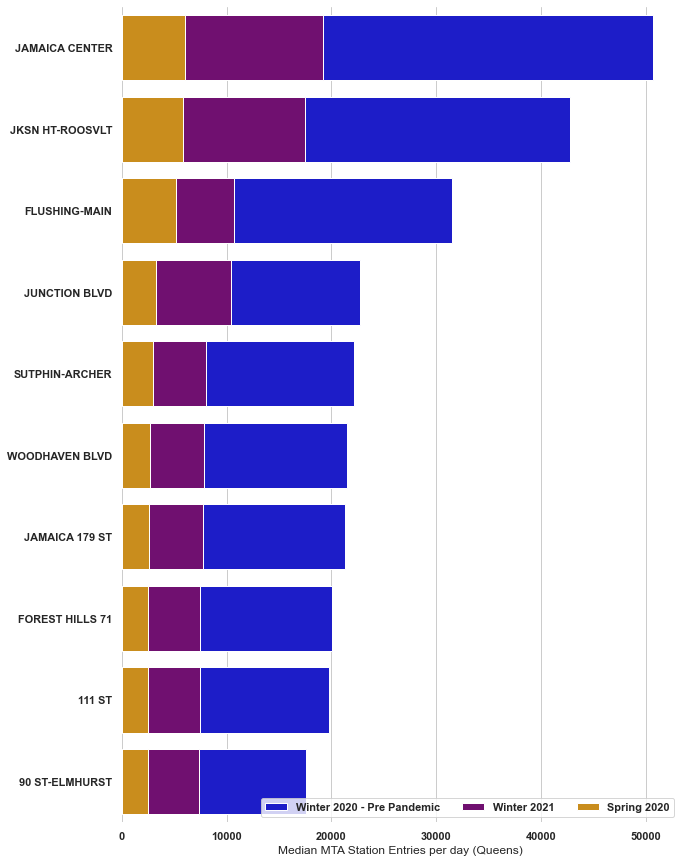

In [117]:
#Stack three time periods on top of each other for top ten stations (as set by Beginning Pandemic top 10)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 15))

# Plot the pre pandemic levels in blue
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_qun_win20.head(10),label="Winter 2020 - Pre Pandemic", color="#0000E5")

# Plot the winter 2021 data purple
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_qun_win21.head(10),label="Winter 2021", color="#800080")

# Plot the recent Beginning pandemic data in orange
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_qun_spr20.head(10), label="Spring 2020", color="#e69500")

# Add a legend and informative axis label
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set( ylabel="", xlabel="Median MTA Station Entries per day (Queens)")
sns.despine(left=True, bottom=True)


## Bronx

In [118]:
#Create separate dataframes for the Bronx Borough based on seasonality/pandemic event--for chartings
brnx_tot = borough_daily[borough_daily['BOROUGH'] == 'Bronx'].reset_index()
brnx_win_2020 = brnx_tot.loc[brnx_tot['DATE'] < '2020-3-15']
brnx_spr_2020 = brnx_tot.loc[(brnx_tot['DATE'] > '2020-3-15') & (brnx_tot['DATE'] < '2020-6-15')]
brnx_sum_2020 = brnx_tot.loc[(brnx_tot['DATE'] > '2020-6-15') & (brnx_tot['DATE'] < '2020-9-15')]
brnx_fall_2020 = brnx_tot.loc[(brnx_tot['DATE'] > '2020-9-15') & (brnx_tot['DATE'] < '2020-12-15')]
brnx_win_2021 = brnx_tot.loc[(brnx_tot['DATE'] > '2020-12-15')]

In [119]:
#Update Add columns based on seaonslity all in one dataframe
brnx1 = brnx_tot['DATE'].between('2019-01-01','2020-03-15')
brnx2 = brnx_tot['DATE'].between('2020-03-16','2020-06-15')
brnx3 = brnx_tot['DATE'].between('2020-06-16','2020-09-15')
brnx4 = brnx_tot['DATE'].between('2020-09-16','2020-12-15')
brnx5 = brnx_tot['DATE'].between('2020-12-16','2021-03-25')
brnx_tot['SEASON'] = np.select([brnx1, brnx2,brnx3,brnx4,brnx5], ['brnx_win_2020','brnx_spr_2020','brnx_sum_2020','brnx_fall_2020','brnx_win_2021'])


In [120]:
brnx_tot.sort_values('DATE',inplace= True)
brnx_tot

,index,BOROUGH,DATE,DAILY_ENTRIES,SEASON
105,1162,Bronx,2019-12-28,192717.0,brnx_win_2020
106,1163,Bronx,2019-12-29,192650.0,brnx_win_2020
64,813,Bronx,2019-12-30,315507.0,brnx_win_2020
63,759,Bronx,2019-12-31,344964.0,brnx_win_2020
165,1257,Bronx,2020-01-01,178528.0,brnx_win_2020
...,...,...,...,...,...
185,1284,Bronx,2021-03-15,172983.0,brnx_win_2021
170,1263,Bronx,2021-03-16,177224.0,brnx_win_2021
135,1210,Bronx,2021-03-17,185823.0,brnx_win_2021
132,1207,Bronx,2021-03-18,186312.0,brnx_win_2021


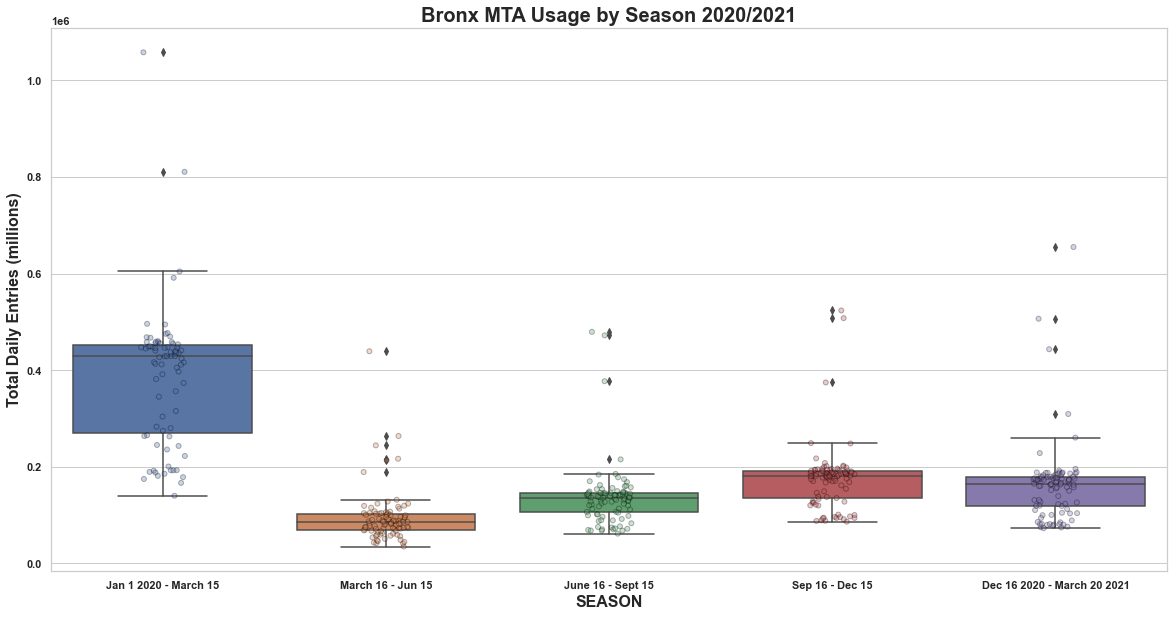

In [121]:

#Create Bronx Boxplots across seasonlity to look at ranges/means/medians of MTA traffic
fig, axs = plt.subplots(figsize=[20, 10])

sns.stripplot(x=brnx_tot['SEASON'], y=brnx_tot['DAILY_ENTRIES'], data=pd.melt(brnx_tot), marker="o", alpha=0.3,jitter=True,
dodge=True,linewidth=1,edgecolor='black')
boxplot = sns.boxplot(x=brnx_tot['SEASON'], y=brnx_tot['DAILY_ENTRIES'])
boxplot.axes.set_title("Bronx MTA Usage by Season 2020/2021", fontsize=20, fontweight='bold')

boxplot.set_xlabel("SEASON", fontsize=16, fontweight='bold')
boxplot.set_ylabel("Total Daily Entries (millions)", fontsize=16, fontweight='bold')

boxplot.set_xticklabels(['Jan 1 2020 - March 15','March 16 - Jun 15','June 16 - Sept 15','Sep 16 - Dec 15','Dec 16 2020 - March 20 2021'], fontweight='bold')

plt.show() 


In [122]:
brnx_station = station_daily[station_daily['BOROUGH'] == 'Bronx'].reset_index()
brnx_win_2020 = brnx_station.loc[brnx_station['DATE'] < '2020-3-15']
brnx_spr_2020 = brnx_station.loc[(brnx_station['DATE'] > '2020-3-15') & (brnx_station['DATE'] < '2020-6-15')]
brnx_sum_2020 = brnx_station.loc[(brnx_station['DATE'] > '2020-6-15') & (brnx_station['DATE'] < '2020-9-15')]
brnx_fall_2020 = brnx_station.loc[(brnx_station['DATE'] > '2020-9-15') & (brnx_station['DATE'] < '2020-12-15')]
brnx_win_2021 = brnx_station.loc[(brnx_station['DATE'] > '2020-12-15')]

brnxs1 = brnx_station['DATE'].between('2019-01-01','2020-03-15')
brnxs2 = brnx_station['DATE'].between('2020-03-16','2020-06-15')
brnxs3 = brnx_station['DATE'].between('2020-06-16','2020-09-15')
brnxs4 = brnx_station['DATE'].between('2020-09-16','2020-12-15')
brnxs5 = brnx_station['DATE'].between('2020-12-16','2021-03-25')
brnx_station['SEASON'] = np.select([brnxs1, brnxs2,brnxs3,brnxs4,brnxs5], ['brnx_win_2020','brnx_spr_2020','brnx_sum_2020','brnx_fall_2020','brnx_win_2021'])


In [123]:
brnx_station

,index,BOROUGH,STATION,DATE,DAILY_ENTRIES,SEASON
0,0,Bronx,138/GRAND CONC,2019-12-28,686.0,brnx_win_2020
1,1,Bronx,138/GRAND CONC,2019-12-29,1083.0,brnx_win_2020
2,2,Bronx,138/GRAND CONC,2019-12-30,1785.0,brnx_win_2020
3,3,Bronx,138/GRAND CONC,2019-12-31,1669.0,brnx_win_2020
4,4,Bronx,138/GRAND CONC,2020-01-01,555.0,brnx_win_2020
...,...,...,...,...,...,...
27265,27265,Bronx,ZEREGA AV,2021-03-15,1039.0,brnx_win_2021
27266,27266,Bronx,ZEREGA AV,2021-03-16,882.0,brnx_win_2021
27267,27267,Bronx,ZEREGA AV,2021-03-17,952.0,brnx_win_2021
27268,27268,Bronx,ZEREGA AV,2021-03-18,203.0,brnx_win_2021


In [124]:
#Add various seasons together for the Bronx stations
brnx_stations_szn = brnx_station.groupby(['STATION','SEASON']).agg({'DAILY_ENTRIES': 'median'}).sort_values(['SEASON','DAILY_ENTRIES','STATION'], ascending=False).reset_index()
brnx_stations_szn.head(10)


,STATION,SEASON,DAILY_ENTRIES
0,FORDHAM RD,brnx_win_2021,7945.0
1,3 AV-149 ST,brnx_win_2021,7818.0
2,161/YANKEE STAD,brnx_win_2021,7463.0
3,167 ST,brnx_win_2021,7108.5
4,KINGSBRIDGE RD,brnx_win_2021,5877.0
5,170 ST,brnx_win_2021,5126.5
6,PARKCHESTER,brnx_win_2021,5044.5
7,149/GRAND CONC,brnx_win_2021,4141.0
8,BEDFORD PK BLVD,brnx_win_2021,4119.5
9,HUNTS POINT AV,brnx_win_2021,4030.0


In [125]:
#Get median traffic to look at the median traffic for busiest Bronx stations during various time periods
brnx_medians=  brnx_stations_szn.groupby(['STATION','SEASON'])[['DAILY_ENTRIES']].median().reset_index()

top_brnx_win20 = brnx_medians[brnx_medians['SEASON'] == 'brnx_win_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_brnx_spr20 = brnx_medians[brnx_medians['SEASON'] == 'brnx_spr_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_brnx_sum20 = brnx_medians[brnx_medians['SEASON'] == 'brnx_sum_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_brnx_fall20 = brnx_medians[brnx_medians['SEASON'] == 'brnx_fall_2020'].sort_values(by='DAILY_ENTRIES', ascending=False)
top_brnx_win21 = brnx_medians[brnx_medians['SEASON'] == 'brnx_win_2021'].sort_values(by='DAILY_ENTRIES', ascending=False)


Text(0, 0.5, 'Station Name')

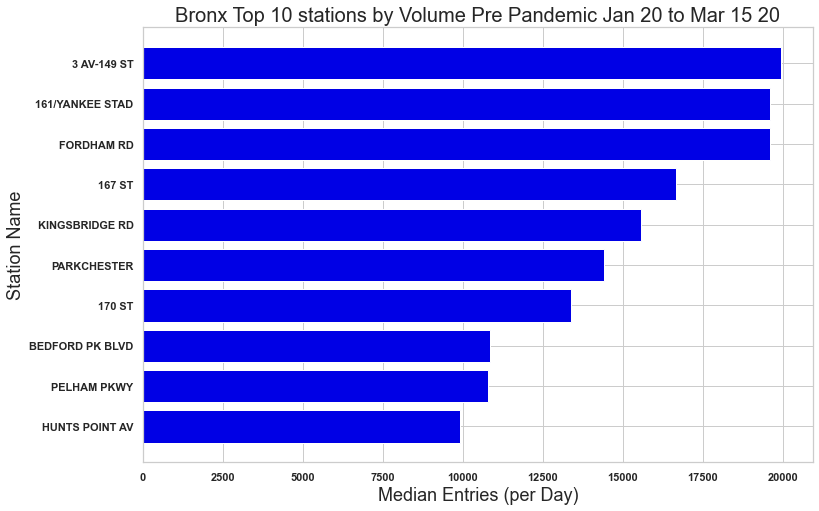

In [126]:
#Focus in on the top ten stations in Bronx pre pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_b = top_brnx_win20.head(10)['DAILY_ENTRIES']
stations_b = top_brnx_win20.head(10)['STATION']

plt.barh(stations_b, entry_b,color = '#0000E5')
plt.gca().invert_yaxis()
plt.title('Bronx Top 10 stations by Volume Pre Pandemic Jan 20 to Mar 15 20', size=20)
plt.xlabel('Median Entries (per Day)', size=18)
plt.ylabel('Station Name', size=18)


Text(0, 0.5, 'Station Name')

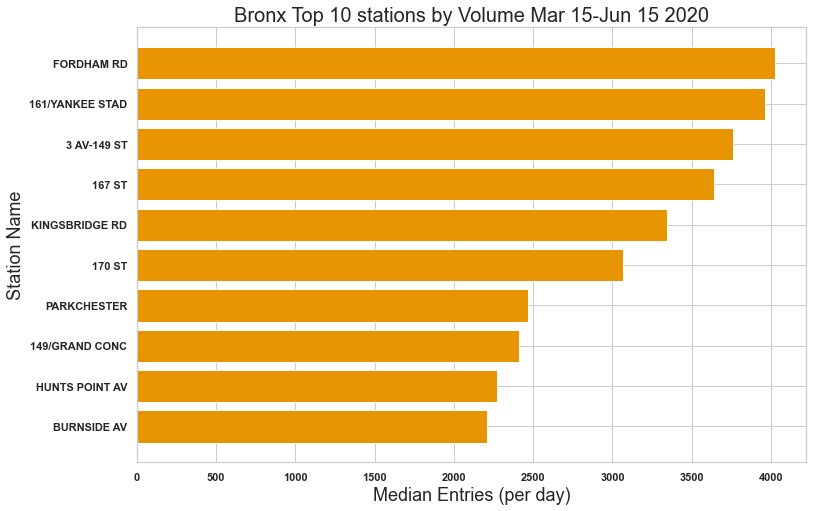

In [127]:
#Focus in on the top ten stations in Bronx starting March 15/beginning of pandemic
plt.figure(figsize=(12, 8))
plt.tight_layout()

entry_b = top_brnx_spr20.head(10)['DAILY_ENTRIES']
stations_b = top_brnx_spr20.head(10)['STATION']

plt.barh(stations_b, entry_b,color = '#e69500')
plt.gca().invert_yaxis()
plt.title('Bronx Top 10 stations by Volume Mar 15-Jun 15 2020', size=20)
plt.xlabel('Median Entries (per day)', size=18)
plt.ylabel('Station Name', size=18)

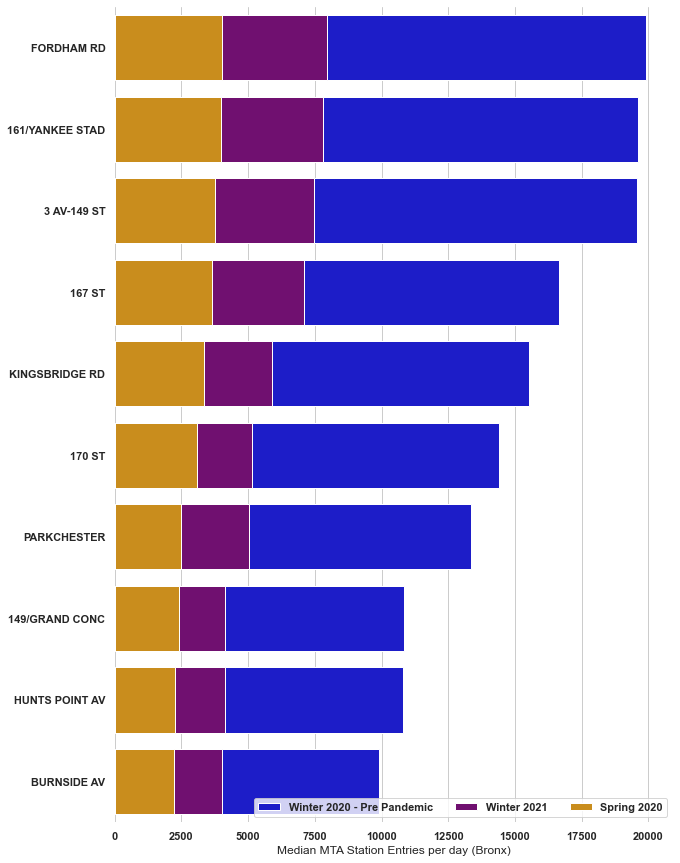

In [128]:
#Stack three time periods on top of each other for top ten stations (as set by Beginning Pandemic top 10)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 15))

# Plot the pre pandemic levels in blue
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_brnx_win20.head(10),label="Winter 2020 - Pre Pandemic", color="#0000E5")

# Plot the winter 2021 data purple
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_brnx_win21.head(10),label="Winter 2021", color="#800080")

# Plot the recent Beginning pandemic data in orange
sns.barplot(x="DAILY_ENTRIES", y="STATION", data=top_brnx_spr20.head(10), label="Spring 2020", color="#e69500")

# Add a legend and informative axis label
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set( ylabel="", xlabel="Median MTA Station Entries per day (Bronx)")
sns.despine(left=True, bottom=True)
